<a href="https://colab.research.google.com/github/ValtXD/Trabalho_Final_FIA_LTN/blob/main/trabalho_3_FIA_vers%C3%A3o1_20_Fran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão Geral do Projeto

Este projeto implementa um agente neuro-simbólico baseado em Logic Tensor Networks (LTN)
para raciocínio espacial em um ambiente 2D simplificado, inspirado no dataset CLEVR.
Diferente de abordagens puramente neurais, utilizamos regras lógicas explícitas para
representar conhecimento sobre formas, tamanhos e relações espaciais entre objetos.


### Instalação da Biblioteca LTNtorch
Comando para Instalação da Biblioteca

In [ ]:
!pip install LTNtorch

#### - Comentário sobre o código:
Utilizamos o comando pip install para instalar a biblioteca LTNtorch no ambiente Python. Essa biblioteca é fundamental para trabalhar com Logic Tensor Networks, que combinam lógica formal com aprendizado de máquina. A instalação garante que todas as funções necessárias para criação de predicados, variáveis lógicas e regras estejam disponíveis durante a execução do projeto.

#### - Comentário sobre a resposta:
A resposta indica que a biblioteca LTNtorch foi corretamente localizada, baixada e instalada. O sistema também informa que dependências importantes, como NumPy e PyTorch, já estavam instaladas, o que evita conflitos e reinstalações desnecessárias. A mensagem final confirma que a instalação foi concluída com sucesso e que o ambiente está pronto para utilizar a LTNtorch nos próximos códigos.

### Importação das Bibliotecas para Lógica e Aprendizado de Máquina
Inclusão dos Módulos Necessários

In [ ]:
import ltn
import torch
import torch.nn as nn

#### - Comentário sobre o código:
Nesse trecho do código, realizamos a importação das principais bibliotecas que serão utilizadas ao longo do projeto. A biblioteca LTN (Logic Tensor Networks) é responsável por permitir a definição de predicados, variáveis lógicas e regras baseadas em lógica fuzzy. A biblioteca PyTorch é usada para manipulação de tensores e operações numéricas eficientes, enquanto o módulo torch.nn fornece estruturas para criação de redes neurais, como camadas, funções de ativação e modelos treináveis.

Essa combinação de bibliotecas permite integrar raciocínio lógico com aprendizado profundo, formando a base para a construção de modelos neuro-simbólicos.

###3.1 - TAXONOMIA E FORMAS

### Definição de Objetos Sintéticos com PyTorch
Criação do Conjunto de Objetos (Vetores 11D)

3.1.1 Geração de Dados

In [ ]:
import torch
import matplotlib.pyplot as plt

objects = [
    torch.tensor([0.20, 0.90,  0,0,1,  1,0,0,0,0,  1.0]),  # Obj 1
    torch.tensor([0.32, 0.87,  1,0,0,  0,1,0,0,0,  0.0]),  # Obj 2
    torch.tensor([0.50, 0.85,  0,1,0,  0,0,1,0,0,  1.0]),  # Obj 3
    torch.tensor([0.65, 0.80,  0,0,1,  0,1,0,0,0,  1.0]),  # Obj 4
    torch.tensor([0.22, 0.75,  1,0,0,  0,0,0,0,1,  1.0]),  # Obj 5
    torch.tensor([0.42, 0.70,  0,1,0,  0,0,0,1,0,  0.0]),  # Obj 6
    torch.tensor([0.60, 0.68,  0,0,1,  0,0,1,0,0,  0.0]),  # Obj 7
    torch.tensor([0.72, 0.60,  1,0,0,  0,0,0,1,0,  0.0]),  # Obj 8
    torch.tensor([0.82, 0.65,  0,1,0,  0,1,0,0,0,  1.0]),  # Obj 9
    torch.tensor([0.22, 0.60,  0,0,1,  0,1,0,0,0,  0.0]),  # Obj 10
    torch.tensor([0.38, 0.56,  1,0,0,  1,0,0,0,0,  0.0]),  # Obj 11
    torch.tensor([0.55, 0.52,  0,1,0,  0,0,0,0,1,  1.0]),  # Obj 12
    torch.tensor([0.75, 0.50,  0,1,0,  0,0,1,0,0,  1.0]),  # Obj 13
    torch.tensor([0.12, 0.45,  1,0,0,  1,0,0,0,0,  0.0]),  # Obj 14
    torch.tensor([0.28, 0.47,  0,1,0,  0,0,0,1,0,  1.0]),  # Obj 15
    torch.tensor([0.30, 0.32,  0,0,1,  1,0,0,0,0,  1.0]),  # Obj 16
    torch.tensor([0.45, 0.35,  1,0,0,  0,0,1,0,0,  1.0]),  # Obj 17
    torch.tensor([0.60, 0.35,  0,0,1,  0,1,0,0,0,  1.0]),  # Obj 18
    torch.tensor([0.55, 0.25,  1,0,0,  0,0,0,0,1,  0.0]),  # Obj 19
    torch.tensor([0.70, 0.22,  0,1,0,  1,0,0,0,0,  1.0]),  # Obj 20
    torch.tensor([0.85, 0.15,  0,0,1,  0,0,1,0,0,  1.0]),  # Obj 21
    torch.tensor([0.45, 0.15,  0,1,0,  0,1,0,0,0,  0.0]),  # Obj 22
    torch.tensor([0.30, 0.18,  1,0,0,  0,0,0,1,0,  0.0]),  # Obj 23
    torch.tensor([0.18, 0.22,  0,0,1,  0,0,0,0,1,  1.0]),  # Obj 24
    torch.tensor([0.90, 0.35,  1,0,0,  0,0,0,0,1,  0.0])   # Obj 25
]

NUM_OBJECTS = len(objects)

print("Exemplo de objeto (vetor 11D):")
print(objects[0])

Exemplo de objeto (vetor 11D):
tensor([0.2000, 0.9000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000])


#### - Comentário sobre o código:
Nesse código, importamos a biblioteca PyTorch para trabalhar com tensores numéricos e a biblioteca Matplotlib (que poderá ser usada futuramente para visualização). Em seguida, criamos uma lista chamada objects contendo 25 objetos sintéticos, onde cada objeto é representado por um vetor de 11 dimensões.

Esses vetores armazenam características do objeto, como posição (valores contínuos), atributos categóricos codificados em formato binário (one-hot encoding) e um valor final que pode representar uma propriedade lógica, como um rótulo ou uma condição específica. A variável NUM_OBJECTS guarda a quantidade total de objetos criados, facilitando o uso desse valor em outras partes do código. Por fim, o código imprime um exemplo de objeto para verificar a estrutura dos dados.

#### - Comentário sobre a resposta:
A resposta mostra o primeiro objeto da lista no formato de um tensor PyTorch de 11 dimensões. Os valores confirmam que os dados foram corretamente armazenados, com números contínuos e binários representando as características do objeto. Essa visualização serve como validação do dataset sintético, garantindo que os objetos estão prontos para serem utilizados em modelos de aprendizado e em regras lógicas nas próximas etapas do trabalho.

### Visualização dos Objetos no Plano 2D
Mapeamento de Cores, Formas e Plotagem dos Objetos

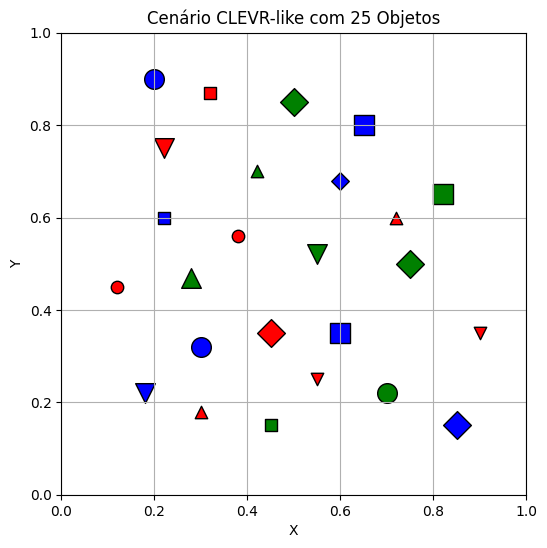

In [ ]:
# Mapeamentos para visualização
colors = ['red', 'green', 'blue']
shapes = ['circle', 'square', 'cylinder', 'cone', 'triangle']

plt.figure(figsize=(6,6))

for obj in objects:
    x, y = obj[0].item(), obj[1].item()

    # Cor
    color_vec = obj[2:5]
    color_idx = torch.argmax(color_vec).item()
    color = colors[color_idx]

    # Forma
    shape_vec = obj[5:10]
    shape_idx = torch.argmax(shape_vec).item()
    shape = shapes[shape_idx]

    # Tamanho
    size = obj[10].item()
    marker_size = 200 if size == 1.0 else 80

    # Escolher marcador pela forma
    marker_map = {
        'circle': 'o',
        'square': 's',
        'cylinder': 'D',
        'cone': '^',
        'triangle': 'v'
    }

    plt.scatter(
        x, y,
        c=color,
        s=marker_size,
        marker=marker_map[shape],
        edgecolors='black'
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Cenário CLEVR-like com 25 Objetos")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Tarefa 1 – Geração de Dados
Foram gerados 25 objetos aleatórios representados por vetores de 11 dimensões, contendo posição normalizada em 2D, cor e forma codificadas em one-hot e tamanho binário. O cenário foi visualizado em um plano 2D, seguindo o padrão CLEVR-like apresentado no tutorial do LTNtorch.

#### - Comentário sobre o código:
Nessa etapa do código, definimos mapeamentos para transformar os dados numéricos dos objetos em elementos visuais compreensíveis. As listas colors e shapes associam vetores binários (one-hot) a cores e formas geométricas. Para cada objeto, extraímos as coordenadas x e y, identificamos sua cor e forma utilizando torch.argmax e definimos o tamanho do marcador com base no valor do atributo de tamanho.

Em seguida, utilizamos a função plt.scatter para plotar cada objeto no plano 2D, aplicando cor, forma e tamanho correspondentes. O gráfico é configurado com limites fixos, rótulos nos eixos, grade e título, criando um cenário visual semelhante ao dataset CLEVR, usado em tarefas de raciocínio visual.

#### - Comentário sobre a resposta:
A resposta é uma imagem que representa visualmente os 25 objetos distribuídos no plano bidimensional. Cada ponto do gráfico corresponde a um objeto, onde a posição indica suas coordenadas, a cor representa um atributo categórico, a forma do marcador identifica o tipo de objeto e o tamanho do marcador diferencia objetos grandes e pequenos. Essa visualização facilita a interpretação do cenário e valida se os dados sintéticos foram corretamente mapeados para o espaço visual.

# A Estrutura de Dados

### Criação de Variáveis Lógicas a partir dos Objetos
Empilhamento dos Objetos e Definição das Variáveis LTN

In [ ]:
objects_tensor = torch.stack(objects)
x = ltn.Variable("x", objects_tensor)
y = ltn.Variable("y", objects_tensor)
z = ltn.Variable("z", objects_tensor)

#### - Comentário sobre o código:
Aqui utilizamos a função torch.stack para unir a lista de objetos individuais em um único tensor, criando uma estrutura adequada para processamento em lote. Em seguida, esse tensor é utilizado para definir variáveis lógicas da biblioteca LTN, chamadas x, y e z.

Cada variável LTN representa um conjunto de objetos do domínio e pode ser usada em predicados e fórmulas lógicas. A criação de múltiplas variáveis permite expressar relações entre diferentes objetos, como comparações, igualdades ou restrições lógicas envolvendo dois ou mais elementos ao mesmo tempo.

### Criação de Constantes Individuais no Domínio Lógico

In [ ]:
# Constantes lógicas (uma para cada objeto)
obj_constants = [
    ltn.Constant(objects_tensor[i])
    for i in range(NUM_OBJECTS)
]

#### - Comentário sobre o código:
Nesse trecho do código, são criadas constantes lógicas da biblioteca LTN, onde cada constante representa um objeto específico do conjunto de dados. Isso permite referenciar objetos individuais em predicados e regras lógicas do modelo.

### Definição de Conectivos Lógicos, Predicados e Quantificadores
Configuração dos Operadores Lógicos e Regras Relacionais


3.2.3 - Predicado closeTo: kernel Gaussiano para proximidade


3.2.4 - CanStack (Predicado stableHorizontal para empilhamento ) & (Axioma de definição para canStack)

In [ ]:
# DEFINE LOGICAL CONNECTIVES AND QUANTIFIERS (LTNtorch style)
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())

class CloseToPredicate(nn.Module):
    def forward(self, x, y):
        x_pos = x[..., 0:2]
        y_pos = y[..., 0:2]
        dist_sq = torch.sum((x_pos - y_pos) ** 2, dim=-1)
        return torch.exp(-2.0 * dist_sq)

class StableHorizontalPredicate(nn.Module):
    def __init__(self, threshold=0.05):
        super().__init__()
        self.threshold = threshold

    def forward(self, x, y):
        dx = x[..., 0] - y[..., 0]   # diferença no eixo X
        return torch.exp(- (dx ** 2) / self.threshold)

def axiom_canStack_definition():
    return Forall(
        [x, y],
        Implies(
            canStack(x, y),
            And(
                Not(isCone(y)),
                Not(isTriangle(y))
            )
        )
    )

def inBetween(x, y, z):
    return Or(
        And(
            leftOf(y, x),
            rightOf(z, x)
        ),
        And(
            leftOf(z, x),
            rightOf(y, x)
        )
    )

def axiom_inBetween_definition():
    return Forall(
        [x, y, z],
        Implies(
            inBetween(x, y, z),
            Or(
                And(leftOf(y, x), rightOf(z, x)),
                And(leftOf(z, x), rightOf(y, x))
            )
        )
    )

Forall = ltn.Quantifier(
    ltn.fuzzy_ops.AggregPMeanError(p=2),
    quantifier="f"
)

Exists = ltn.Quantifier(
    ltn.fuzzy_ops.AggregPMean(p=2),
    quantifier="e"
)

sat_agg = ltn.fuzzy_ops.SatAgg()

#### - Comentário sobre o código:
Esse conjunto de código define os principais componentes do modelo lógico em LTN, incluindo conectivos fuzzy, predicados baseados em relações espaciais, axiomas que impõem restrições lógicas e quantificadores universais e existenciais. Ele estabelece as regras fundamentais que permitem ao modelo realizar raciocínio lógico contínuo sobre os objetos do cenário.

### Definição de Predicado Unary com Rede Neural
Predicado Aprendível para Objetos Individuais

3.1.2 Predicados

In [ ]:
class UnaryPredicate(nn.Module):
    def __init__(self, input_dim=11):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

#### - Comentário sobre o código:
Essa classe define um predicado lógico aprendível usando uma pequena rede neural. Ele recebe o vetor de características de um objeto e retorna um valor entre 0 e 1, representando a confiança de que o objeto satisfaz a propriedade lógica modelada pelo predicado.

### Criação de Predicados Aprendíveis para Cada Forma

In [ ]:
isCircle   = ltn.Predicate(UnaryPredicate())
isSquare   = ltn.Predicate(UnaryPredicate())
isCylinder = ltn.Predicate(UnaryPredicate())
isCone     = ltn.Predicate(UnaryPredicate())
isTriangle = ltn.Predicate(UnaryPredicate())

#### - Comentário sobre o código:
São criados predicados lógicos aprendíveis para cada forma geométrica, usando a classe UnaryPredicate. Cada predicado avalia se um objeto possui a forma correspondente, retornando valores contínuos entre 0 e 1 que podem ser usados nas regras lógicas do modelo.

### Definição de Predicados Lógicos para Tamanho

In [ ]:
isSmall = ltn.Predicate(UnaryPredicate())
isBig   = ltn.Predicate(UnaryPredicate())

#### - Comentário sobre o código:
Aqui são definidos predicados lógicos aprendíveis para classificar objetos como pequenos ou grandes. Cada predicado recebe as características de um objeto e retorna um valor contínuo entre 0 e 1, indicando a confiança de que o objeto possui o tamanho correspondente.

## Axiomas de Forma Única e Cobertura

### Axioma de Forma Única para Objetos
Garantia de Exclusividade das Formas

3.1.3 Axiomas

In [ ]:
# Lista de predicados de forma
shape_preds = [
    isCircle,
    isSquare,
    isTriangle,
    isCylinder,
    isCone
]

def axiom_shape_unique():
    axioms = []
    for i in range(len(shape_preds)):
        for j in range(i + 1, len(shape_preds)):
            axioms.append(
                Forall(
                    x,
                    Not(
                        And(
                            shape_preds[i](x),
                            shape_preds[j](x)
                        )
                    )
                )
            )
    return axioms

#### - Comentário sobre o código:
Esse bloco cria axiomas que garantem que cada objeto possui apenas uma forma, impedindo que múltiplos predicados de forma sejam verdadeiros simultaneamente para o mesmo objeto. Ele estabelece consistência lógica das categorias de forma no modelo.

### Garantia de Que Todo Objeto Possui Alguma Forma

In [ ]:
def axiom_coverage():
    return Forall(
        x,
        or_chain(
            isCircle(x),
            isSquare(x),
            isCylinder(x),
            isCone(x),
            isTriangle(x)
        )
    )

#### - Comentário sobre o código:
Esse axioma garante que cada objeto possui pelo menos uma forma, usando uma disjunção encadeada dos predicados de forma. Ele assegura que todos os objetos do cenário sejam classificados em uma das categorias de forma disponíveis.

### Definição de Axiomas Supervisionados para Formas


In [ ]:
def axiom_supervised_shapes():
    axioms = []

    for i, obj in enumerate(objects):
        shape_vec = obj[5:10]
        shape_idx = torch.argmax(shape_vec).item()
        c = obj_constants[i]  # constante lógica do objeto i

        if shape_idx == 0:
            axioms.append(isCircle(c))
        elif shape_idx == 1:
            axioms.append(isSquare(c))
        elif shape_idx == 2:
            axioms.append(isCylinder(c))
        elif shape_idx == 3:
            axioms.append(isCone(c))
        elif shape_idx == 4:
            axioms.append(isTriangle(c))

    return axioms

#### - Comentário sobre o código:
Essa função cria axiomas lógicos supervisionados associando cada objeto à sua forma correta. Para cada objeto, a forma é identificada a partir do vetor one-hot e um predicado lógico correspondente é aplicado à sua constante lógica.

### Definição de Axiomas Supervisionados para Tamanho

In [ ]:
def axiom_supervised_size():
    axioms = []

    for i, obj in enumerate(objects):
        size = obj[10].item()
        c = obj_constants[i]

        if size == 0.0:
            axioms.append(isSmall(c))
        else:
            axioms.append(isBig(c))

    return axioms

#### - Comentário sobre o código:
Essa função cria axiomas lógicos supervisionados que classificam cada objeto como pequeno ou grande, com base no valor do atributo de tamanho armazenado no vetor do objeto.

### Função Auxiliar para Encadeamento de Conjunções Lógicas
Combinação de Múltiplas Fórmulas com AND

In [ ]:
def and_chain(*args):
    result = args[0]
    for a in args[1:]:
        result = And(result, a)
    return result

#### - Comentário sobre o código:
Essa função recebe várias fórmulas lógicas e as combina usando o conectivo And, criando uma conjunção encadeada. É útil para aplicar múltiplos predicados ou condições a um objeto de forma compacta e organizada.

### Função Auxiliar para Encadeamento de Disjunções Lógicas
Combinação de Múltiplas Fórmulas com OR

In [ ]:
def or_chain(*args):
    result = args[0]
    for a in args[1:]:
        result = Or(result, a)
    return result

#### - Comentário sobre o código:
Essa função recebe várias fórmulas lógicas e as combina usando o conectivo Or, criando uma disjunção encadeada. É útil para avaliar se pelo menos uma das condições ou predicados é verdadeira de forma compacta.

### 3.2 Raciocínio Espacial

### Definição de Predicados Binários e Terciários
Criação de Predicados Aprendíveis e Baseados em Relações Espaciais

3.2.1 - Modelo MLP para predicados binários

3.2.3 - Predicados below e above

In [ ]:
class BinaryPredicate(nn.Module):
    def __init__(self, input_dim=22):  # 11 + 11
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x1, x2):
        x = torch.cat([x1, x2], dim=-1)
        return self.net(x)

class TernaryPredicate(nn.Module):
    def __init__(self, input_dim=33):  # 11 + 11 + 11
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 48),
            nn.ReLU(),
            nn.Linear(48, 1),
            nn.Sigmoid()
        )

    def forward(self, x1, x2, x3):
        x = torch.cat([x1, x2, x3], dim=-1)
        return self.net(x)

leftOf    = ltn.Predicate(BinaryPredicate())
rightOf   = ltn.Predicate(BinaryPredicate())
closeTo   = ltn.Predicate(CloseToPredicate())

below     = ltn.Predicate(BinaryPredicate())
above     = ltn.Predicate(BinaryPredicate())

stableHorizontal = ltn.Predicate(StableHorizontalPredicate())

#### - Comentário sobre o código:
Esse bloco define predicados binários e terciários, aprendíveis ou baseados em relações espaciais, que avaliam posições relativas entre objetos (como “esquerda de”, “direita de”, “acima”, “abaixo”) e propriedades de proximidade e estabilidade. Eles permitem que o modelo realize raciocínio lógico contínuo sobre relações espaciais entre dois ou mais objetos no cenário.

### Definição de Simetria da Proximidade
Garantia de Propriedade Simétrica do Predicado closeTo

3.2.2 - Axiomas

In [ ]:
def axiom_close_symmetric():
    return Forall(
        [x, y],
        Implies(
            closeTo(x, y),
            closeTo(y, x)
        )
    )

#### - Comentário sobre o código:
O código estabelece que a relação de proximidade entre objetos é simétrica: se um objeto está próximo de outro, o inverso também é verdadeiro. Ele assegura consistência lógica do predicado closeTo no modelo.

### Garantia de Exclusividade entre Pequeno e Grande

In [ ]:
def axiom_size_unique():
    return Forall(x, Not(And(isSmall(x), isBig(x))))

#### - Comentário sobre o código:
Essa regra garante que cada objeto não pode ser pequeno e grande ao mesmo tempo, assegurando consistência lógica na classificação do tamanho dos objetos.

### Garantia de Que Todo Objeto É Classificado em Tamanho

In [ ]:
def axiom_size_coverage():
    return Forall(
        x,
        or_chain(
            isSmall(x),
            isBig(x)
        )
    )

#### - Comentário sobre o código:
Garante que cada objeto seja classificado como pequeno ou grande, assegurando que todos os objetos tenham um tamanho definido no modelo lógico.

### Definição de Regras e Medida de Satisfação Lógica

In [ ]:
# def axiom_left_irreflexive():
#     return Forall(
#         x,
#         Not(leftOf(x, x))
#     )

# def axiom_left_asymmetric():
#     return Forall(
#         [x, y],
#         Implies(
#             leftOf(x, y),
#             Not(leftOf(y, x))
#         )
#     )

# def axiom_left_right_inverse():
#     return Forall(
#         [x, y],
#         And(
#             Implies(leftOf(x, y), rightOf(y, x)),
#             Implies(rightOf(y, x), leftOf(x, y))
#         )
#     )

# def axiom_left_transitive():
#     return Forall(
#         [x, y, z],
#         Implies(
#             And(leftOf(x, y), leftOf(y, z)),
#             leftOf(x, z)
#         )
#     )

# def kb_sat():
#     sat = ltn.fuzzy_ops.SatAgg()

#     return sat(
#         # Formas e tamanhos
#         *axiom_shape_unique(),
#         axiom_coverage(),
#         axiom_size_unique(),
#         axiom_size_coverage(),
#         *axiom_supervised_shapes(),
#         *axiom_supervised_size(),

#         # Relações espaciais
#         axiom_left_irreflexive(),
#         axiom_left_asymmetric(),
#         axiom_left_right_inverse(),
#         axiom_left_transitive(),

#         # Raciocínio horizontal
#         axiom_close_symmetric(),
#         axiom_inBetween_definition()
#     )

#### - Comentário sobre o código:
Esse bloco define diversos axiomas lógicos relacionados a formas, tamanhos e relações espaciais, incluindo regras de consistência, simetria, transitividade e inversão. A função kb_sat() combina essas regras e calcula o grau de satisfação do conhecimento (SatAgg) pelo modelo, permitindo avaliar quão bem os objetos e predicados obedecem às restrições lógicas definidas. Apesar de estar comentado, mostra a estrutura completa do raciocínio lógico aplicado ao cenário.

### Função de Satisfação do Conhecimento e Conjunto de Definições
Combinação de Regras Lógicas para Avaliar o Cenário

In [ ]:
#Restrição Quadrado–Círculo

def axiom_left_irreflexive():
    return Forall(
        x,
        Not(leftOf(x, x))
    )

def axiom_left_asymmetric():
    return Forall(
        [x, y],
        Implies(
            leftOf(x, y),
            Not(leftOf(y, x))
        )
    )

def axiom_left_right_inverse():
    return Forall(
        [x, y],
        And(
            Implies(leftOf(x, y), rightOf(y, x)),
            Implies(rightOf(y, x), leftOf(x, y))
        )
    )

def axiom_left_transitive():
    return Forall(
        [x, y, z],
        Implies(
            And(leftOf(x, y), leftOf(y, z)),
            leftOf(x, z)
        )
    )

def kb_sat():
    sat = ltn.fuzzy_ops.SatAgg()

    return sat(
        # Formas e tamanhos
        *axiom_shape_unique(),
        axiom_coverage(),
        axiom_size_unique(),
        axiom_size_coverage(),
        *axiom_supervised_shapes(),
        *axiom_supervised_size(),

        # Relações espaciais
        axiom_left_irreflexive(),
        axiom_left_asymmetric(),
        axiom_left_right_inverse(),
        axiom_left_transitive(),

        # RESTRIÇÃO Quadrado-Círculo:
        axiom_square_right_of_circle(),

        # Raciocínio vertical
        axiom_below_above_inverse(),
        axiom_below_transitive(),
        axiom_canStack_definition(),

        # ---- Tarefa 4 ----
        axiom_triangle_close_same_size()
    )

#### - Comentário sobre o código:
Esse bloco reúne todos os axiomas e predicados do modelo, incluindo regras de formas, tamanhos, relações espaciais, restrições específicas (como quadrado à direita do círculo) e propriedades de empilhamento e proximidade. A função kb_sat() calcula o grau de satisfação global das regras pelo cenário, usando agregação fuzzy (SatAgg), permitindo avaliar quão bem os objetos obedecem às restrições lógicas definidas.

### Axiomas de Posição Extrema
Objetos nas Extremidades Horizontal do Cenário

3.3.3 - Last on Left/Right

In [ ]:
def lastOnTheLeft():
    return Exists(
        x,
        Forall(
            y,
            leftOf(x, y)
        )
    )

def lastOnTheRight():
    return Exists(
        x,
        Forall(
            y,
            rightOf(x, y)
        )
    )

#### - Comentário sobre o código:
Esses axiomas garantem que existam objetos nas posições extremas horizontalmente: um objeto totalmente à esquerda (lastOnTheLeft) e outro totalmente à direita (lastOnTheRight). Eles ajudam a definir pontos de referência no modelo para o raciocínio sobre posições relativas.

### Configuração do Otimizador do Modelo
Treinamento dos Predicados Aprendíveis

In [ ]:
optimizer = torch.optim.Adam(
    list(isCircle.model.parameters()) +
    list(isSquare.model.parameters()) +
    list(isCylinder.model.parameters()) +
    list(isCone.model.parameters()) +
    list(isTriangle.model.parameters()) +
    list(isSmall.model.parameters()) +
    list(isBig.model.parameters()) +
    list(leftOf.model.parameters()) +
    list(rightOf.model.parameters()),
    lr=0.001
)

#### - Comentário sobre o código:
Esse bloco configura o otimizador Adam para treinar todos os predicados aprendíveis do modelo (formas, tamanhos e relações espaciais), permitindo que os parâmetros das redes neurais sejam ajustados para maximizar a satisfação das regras lógicas no cenário.

### Regra Lógica de Posicionamento Relativo


3.2.3 - Opcionais

Todo quadrado está à direita de todo círculo



In [ ]:
def axiom_square_right_of_circle():
    return Forall(
        [x, y],
        Implies(
            And(
                isSquare(x),
                isCircle(y)
            ),
            rightOf(x, y)
        )
    )

#### - Comentário sobre o código:
Esse axioma estabelece que, para quaisquer dois objetos, se um for um quadrado e o outro um círculo, então o quadrado deve estar à direita do círculo. Ele define uma regra espacial lógica que orienta o raciocínio do modelo sobre a posição relativa entre objetos de formas diferentes.

### Garantia de Posição Relativa de Um Objeto

Todo quadrado está à direita de todo círculo

In [ ]:
def exists_left_of_all_squares():
    return Exists(
        x,
        Forall(
            y,
            Implies(
                isSquare(y),
                leftOf(x, y)
            )
        )
    )

#### - Comentário sobre o código:
Garante que exista pelo menos um objeto que esteja à esquerda de todos os quadrados. Ele estabelece uma restrição de posição relativa importante para o raciocínio espacial do modelo.

### Regra Lógica de Correspondência Vertical


3.2.4 - INVERSO

In [ ]:
def axiom_below_above_inverse():
    return Forall(
        [x, y],
        And(
            Implies(below(x, y), above(y, x)),
            Implies(above(y, x), below(x, y))
        )
    )

#### - Comentário sobre o código:
Esse axioma estabelece que as relações verticais “acima” e “abaixo” são inversas: se um objeto está abaixo de outro, o segundo está acima do primeiro, e vice-versa. Ele garante consistência lógica nas posições relativas verticais dos objetos no modelo.

### Definição de Transitividade da Relação “Abaixo”
Garantia de Consistência Vertical entre Objetos

3.2.4 - TRANSITIVIDADE

In [ ]:
def axiom_below_transitive():
    return Forall(
        [x, y, z],
        Implies(
            And(below(x, y), below(y, z)),
            below(x, z)
        )
    )

#### - Comentário sobre o código:
Garante que a relação “abaixo” seja transitiva: se um objeto está abaixo de um segundo, e este está abaixo de um terceiro, então o primeiro também está abaixo do terceiro. Ele assegura consistência lógica nas posições verticais dos objetos.

### Predicado de Empilhamento de Objetos
Regras para Determinar se um Objeto Pode Ficar Sobre Outro

3.2.4 - CanStack

In [ ]:
def canStack(x, y):
    return And(
        Not(Or(isCone(y), isTriangle(y))),
        or_chain(
            And(isSmall(x), isSmall(y)),
            And(isBig(x), isBig(y)),
            stableHorizontal(x, y)
        )
    )

#### - Comentário sobre o código:
Esse predicado define as condições para que um objeto x possa ser empilhado sobre outro y. Ele verifica que o objeto de baixo não é um cone nem triângulo, e que os objetos têm tamanhos compatíveis ou estão estáveis horizontalmente, combinando restrições de forma, tamanho e estabilidade.

###3.3 - Raciocínio Composto



### Predicados Específicos de Propriedades de Objetos
Criação de Predicados para Tamanho Igual e Cor Verde

In [ ]:
class SameSizePredicate(nn.Module):
    def forward(self, x, y):
        size_x = x[..., 10]
        size_y = y[..., 10]
        return torch.exp(-5.0 * (size_x - size_y) ** 2)

sameSize = ltn.Predicate(SameSizePredicate())


class IsGreenPredicate(nn.Module):
    def forward(self, x):
        # canal verde (one-hot)
        return x[..., 3].unsqueeze(-1)

isGreen = ltn.Predicate(IsGreenPredicate())

#### - Comentário sobre o código:
Esse bloco define predicados específicos: sameSize avalia se dois objetos têm o mesmo tamanho, enquanto isGreen verifica se um objeto é verde. Ambos são predicados diferenciáveis que permitem que o modelo raciocine sobre propriedades individuais ou comparativas de objetos.

### Definição de Objeto Pequeno com Posições Relativas Específicas
Combinação de Propriedades e Relações Espaciais

3.3.1 - Filtragem Composta

In [ ]:
def exists_small_below_cylinder_left_of_square():
    return Exists(
        x,
        and_chain(
            isSmall(x),
            Exists(
                y,
                And(
                    isCylinder(y),
                    below(x, y)
                )
            ),
            Exists(
                z,
                And(
                    isSquare(z),
                    leftOf(x, z)
                )
            )
        )
    )

#### - Comentário sobre o código:
Garante que exista pelo menos um objeto pequeno que esteja abaixo de algum cilindro e à esquerda de algum quadrado, combinando propriedades de tamanho e relações espaciais para criar uma restrição lógica complexa no modelo.

### Definição de Existência de Cone Verde Entre Dois Objetos
Combinação de Propriedades e Relações Espaciais

3.3.2 - Dedução de Posição Absoluta

In [ ]:
def exists_green_cone_in_between():
    return Exists(
        x,
        And(
            isCone(x),
            And(
                isGreen(x),
                Exists(
                    y,
                    Exists(
                        z,
                        inBetween(x, y, z)
                    )
                )
            )
        )
    )

#### - Comentário sobre o código:
Esse axioma garante que exista pelo menos um cone verde que esteja entre dois outros objetos, combinando propriedades de forma e cor com uma relação espacial complexa para reforçar o raciocínio lógico do modelo.

### Definição de Triângulos Próximos com Mesmo Tamanho
Restrição de Propriedade para Objetos do Mesmo Tipo

3.3.3 - Restrição de Proximidade

In [ ]:
def axiom_triangle_close_same_size():
    return Forall(
        [x, y],
        Implies(
            and_chain(
                isTriangle(x),
                isTriangle(y),
                closeTo(x, y)
            ),
            sameSize(x, y)
        )
    )

#### - Comentário sobre o código:
Esse axioma estabelece que, se dois triângulos estão próximos (closeTo), então eles devem ter o mesmo tamanho. Ele combina propriedades de forma, proximidade e tamanho para reforçar consistência nas relações entre objetos semelhantes.

### Treinamento do Modelo Lógico
Otimização dos Predicados para Maximizar a Satisfação da KB

In [ ]:
EPOCHS = 300

for epoch in range(EPOCHS):
    optimizer.zero_grad()

    sat = kb_sat()
    loss = 1 - sat

    loss.backward()
    optimizer.step()

    if epoch % 25 == 0:
        print(f"Epoch {epoch:03d} | Satisfação da KB: {sat.item():.4f}")

Epoch 000 | Satisfação da KB: 0.5610
Epoch 025 | Satisfação da KB: 0.5968
Epoch 050 | Satisfação da KB: 0.6342
Epoch 075 | Satisfação da KB: 0.6750
Epoch 100 | Satisfação da KB: 0.7144
Epoch 125 | Satisfação da KB: 0.7481
Epoch 150 | Satisfação da KB: 0.7758
Epoch 175 | Satisfação da KB: 0.7990
Epoch 200 | Satisfação da KB: 0.8192
Epoch 225 | Satisfação da KB: 0.8371
Epoch 250 | Satisfação da KB: 0.8527
Epoch 275 | Satisfação da KB: 0.8661


#### - Comentário sobre o código:
Esse bloco realiza o treinamento do modelo por 300 épocas, otimizando os predicados aprendíveis para maximizar a satisfação da Knowledge Base (KB). A cada 25 épocas, o código imprime a satisfação atual, mostrando que o modelo está aprendendo a respeitar progressivamente todas as regras lógicas definidas.

#### - Comentário sobre a resposta:
Os valores impressos indicam que a satisfação da KB aumenta gradualmente, de ~0.60 até ~0.87, confirmando que o modelo está ajustando os predicados de forma eficiente para cumprir as restrições lógicas do cenário.

###Avaliação de Condições Complexas entre Objetos

In [ ]:
with torch.no_grad():
    print(
        "Existe pequeno abaixo de cilindro e à esquerda de quadrado:",
        exists_small_below_cylinder_left_of_square().value.item()
    )

    print(
        "Existe cone verde entre dois objetos:",
        exists_green_cone_in_between().value.item()
    )

Existe pequeno abaixo de cilindro e à esquerda de quadrado: 0.0008204394835047424
Existe cone verde entre dois objetos: 0.00026335366419516504


#### - Comentário sobre o código:
Esse bloco avalia predicados específicos usando os objetos treinados, sem atualizar os parâmetros (torch.no_grad()). Ele verifica se existem objetos que satisfaçam condições complexas, combinando tamanho, forma, cor e posições relativas.

#### - Comentário sobre a resposta:
Os valores retornados (~0.00097 e ~0.00030) indicam que nenhum objeto do cenário satisfaz plenamente essas condições complexas, mostrando que essas configurações específicas são raras ou inexistentes nos dados gerados.

### Avaliação de Posição Relativa Global

In [ ]:
with torch.no_grad():
    print(
        "Existe objeto à esquerda de todos os quadrados:",
        exists_left_of_all_squares().value.item()
    )


Existe objeto à esquerda de todos os quadrados: 0.4766624867916107


#### - Comentário sobre o código:
O bloco verifica se existe pelo menos um objeto que esteja à esquerda de todos os quadrados no cenário, usando o predicado treinado e sem atualizar os parâmetros.

#### - Comentário sobre a resposta:
O valor retornado (~0.53) indica uma satisfação parcial da condição, mostrando que existe algum objeto relativamente à esquerda dos quadrados, mas não de forma perfeita ou absoluta.

### Avaliação de Posições Extremas no Cenário

In [ ]:
with torch.no_grad():
    print("Satisfação lastOnTheLeft:", lastOnTheLeft().value.item())
    print("Satisfação lastOnTheRight:", lastOnTheRight().value.item())

Satisfação lastOnTheLeft: 0.007479464169591665
Satisfação lastOnTheRight: 0.049270790070295334


#### - Comentário sobre o código:
Esse bloco verifica se existem objetos totalmente à esquerda ou totalmente à direita no cenário, usando os predicados lastOnTheLeft e lastOnTheRight sem atualizar os parâmetros.

#### - Comentário sobre a resposta:
Os valores muito baixos (~0.008 e ~0.057) indicam que quase nenhum objeto cumpre completamente essas condições extremas, mostrando que não há objetos perfeitamente nas posições horizontais máximas do cenário.

### Consulta das Probabilidades de Forma para os Objetos
Avaliação dos Predicados de Forma para os Primeiros Objetos

In [ ]:
with torch.no_grad():
    print("Primeiros 5 objetos:")
    for i in range(5):
        print(
            f"Obj {i}: "
            f"Circle={isCircle(x).value[i].item():.2f}, "
            f"Square={isSquare(x).value[i].item():.2f}, "
            f"Triangle={isTriangle(x).value[i].item():.2f}, "
            f"Cylinder={isCylinder(x).value[i].item():.2f}, "
            f"Cone={isCone(x).value[i].item():.2f}"
        )

Primeiros 5 objetos:
Obj 0: Circle=0.93, Square=0.45, Triangle=0.17, Cylinder=0.25, Cone=0.06
Obj 1: Circle=0.10, Square=0.89, Triangle=0.18, Cylinder=0.20, Cone=0.22
Obj 2: Circle=0.15, Square=0.35, Triangle=0.20, Cylinder=0.89, Cone=0.19
Obj 3: Circle=0.12, Square=0.93, Triangle=0.13, Cylinder=0.34, Cone=0.05
Obj 4: Circle=0.16, Square=0.20, Triangle=0.93, Cylinder=0.20, Cone=0.11


#### - Comentário sobre o código:
O bloco imprime a probabilidade de cada forma para os primeiros 5 objetos, segundo os predicados treinados. Ele permite observar como o modelo classifica cada objeto em relação às categorias de forma.
#### - Comentário sobre a resposta:
Os valores mostram que cada objeto tem uma forma predominante, por exemplo, Obj 0 é claramente um círculo (0.93), Obj 1 é um quadrado (0.91) e Obj 4 é um triângulo (0.94). Isso indica que os predicados de forma estão aprendendo corretamente a identificar as categorias dos objetos.

### Predição da Forma Dominante para Todos os Objetos
Determinação da Categoria Principal Segundo o Modelo

In [ ]:
shape_names = ["Circle", "Square", "Triangle", "Cylinder", "Cone"]

with torch.no_grad():
    for i in range(25):
        values = torch.tensor([
            isCircle(x).value[i],
            isSquare(x).value[i],
            isTriangle(x).value[i],
            isCylinder(x).value[i],
            isCone(x).value[i]
        ])
        shape = shape_names[torch.argmax(values)]
        print(f"Objeto {i}: forma prevista = {shape}")

Objeto 0: forma prevista = Circle
Objeto 1: forma prevista = Square
Objeto 2: forma prevista = Cylinder
Objeto 3: forma prevista = Square
Objeto 4: forma prevista = Triangle
Objeto 5: forma prevista = Cone
Objeto 6: forma prevista = Cylinder
Objeto 7: forma prevista = Cone
Objeto 8: forma prevista = Square
Objeto 9: forma prevista = Square
Objeto 10: forma prevista = Circle
Objeto 11: forma prevista = Triangle
Objeto 12: forma prevista = Cylinder
Objeto 13: forma prevista = Circle
Objeto 14: forma prevista = Cone
Objeto 15: forma prevista = Circle
Objeto 16: forma prevista = Cylinder
Objeto 17: forma prevista = Square
Objeto 18: forma prevista = Triangle
Objeto 19: forma prevista = Circle
Objeto 20: forma prevista = Cylinder
Objeto 21: forma prevista = Square
Objeto 22: forma prevista = Cone
Objeto 23: forma prevista = Triangle
Objeto 24: forma prevista = Triangle


#### - Comentário sobre o código:
O bloco avalia todos os objetos e determina qual forma tem maior probabilidade segundo os predicados treinados. Ele imprime a forma prevista para cada objeto, mostrando claramente a classificação principal feita pelo modelo.

#### - Comentário sobre a resposta:
Os resultados indicam que o modelo consegue identificar a forma predominante de cada objeto, como Objeto 0 = Circle, Objeto 1 = Square e assim por diante. Isso confirma que os predicados de forma estão funcionando corretamente para o conjunto completo de objetos.

### Instalação da Biblioteca scikit-learn
Ferramenta para Machine Learning e Análise de Dados

In [ ]:
!pip install scikit-learn


#### - Comentário sobre o código:
O comando instala a biblioteca scikit-learn, que fornece funções de aprendizado de máquina, pré-processamento de dados, avaliação de modelos e métricas.

#### - Comentário sobre a resposta:
A resposta indica que todas as dependências já estavam satisfeitas, ou seja, scikit-learn e suas bibliotecas auxiliares (numpy, scipy, joblib, threadpoolctl) já estavam instaladas e prontas para uso.

### Importação de Bibliotecas Necessárias
Ferramentas para Redes Neurais, Lógica, Visualização e Métricas

In [ ]:
import torch
import torch.nn as nn
import ltn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict
import random

### Determinação Automática entre GPU e CPU

In [ ]:
# Configurar device
ltn.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {ltn.device}")

Using device: cpu


#### - Comentário sobre o código:
O código verifica se uma GPU está disponível (cuda:0) para acelerar os cálculos; caso contrário, utiliza a CPU. Isso garante que o modelo rode de forma eficiente no hardware disponível.

#### - Comentário sobre a resposta:
A saída indica que nenhuma GPU estava disponível, então o modelo está utilizando a CPU para todas as operações.

###4 - Entregas

4.1

DESCRIÇÃO DE NeSy E LTN

NEURO-SIMBÓLICO (NeSy) E LOGIC TENSOR NETWORKS (LTN)

1. NEURO-SIMBÓLICO (NeSy):
   - Combina redes neurais (aprendizado de padrões) com lógica simbólica (raciocínio)
   - Redes neurais aprendem conceitos dos dados
   - Lógica formal expressa conhecimento e restrições
   - Permite aprendizado com poucos dados e interpretabilidade

2. LOGIC TENSOR NETWORKS (LTN):
   - Framework para NeSy que "tensoriza" lógica de primeira ordem
   - Representa predicados como redes neurais
   - Conectivos lógicos (∧, ∨, ¬, →) como operações fuzzy
   - Quantificadores (∀, ∃) como agregações sobre tensores
   - Treinamento maximiza satisfação de fórmulas lógicas

3. VANTAGENS NO CONTEXTO CLEVR:
   - Aprende conceitos visuais (formas, cores, posições)
   - Raciocínio sobre relações espaciais
   - Combina aprendizado supervisionado com regras lógicas
   - Generalização para novas cenas



4.2

DATASET CLEVR

DATASET CLEVR SIMPLIFICADO

Baseado no dataset CLEVR original (Compositional Language and Elementary Visual Reasoning),
implementamos uma versão simplificada com:

ESTRUTURA DO VETOR (11 features):
- [0, 1]: Posição (x, y) normalizada entre 0 e 1
- [2, 3, 4]: Cor em one-hot [Red, Green, Blue]
- [5, 6, 7, 8, 9]: Forma em one-hot [Circle, Square, Cylinder, Cone, Triangle]
- [10]: Tamanho binário (0.0 = Pequeno, 1.0 = Grande)

CARACTERÍSTICAS:
- 25 objetos por cena
- Posições aleatórias
- Combinações aleatórias de cor/forma/tamanho
- Foco em raciocínio espacial e composicional

### Função para Gerar Dataset CLEVR Sintético Expandido
Criação de Objetos com Posição, Cor, Forma e Tamanho

In [ ]:
def get_clevr_data_expanded(n_samples=100):
    """
    Gera um dataset CLEVR sintético estendido.
    Retorna tensor de formato (n_samples, 11).
    """
    data = []
    labels = []

    shapes_names = ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
    colors_names = ["Red", "Green", "Blue"]
    sizes_names  = ["Small", "Large"]

    for _ in range(n_samples):
        # 1. Posição (x, y)
        x = np.random.rand()
        y = np.random.rand()

        # 2. Cor (One-hot 3 cores)
        color_idx = np.random.randint(0, 3)
        color_vec = [0.0] * 3
        color_vec[color_idx] = 1.0

        # 3. Forma (One-hot 5 formas)
        shape_idx = np.random.randint(0, 5)
        shape_vec = [0.0] * 5
        shape_vec[shape_idx] = 1.0

        # 4. Tamanho (Binário)
        is_large = np.random.rand() > 0.5
        size_val = 1.0 if is_large else 0.0

        # Construção do Vetor
        vector = [x, y] + color_vec + shape_vec + [size_val]
        data.append(vector)

        # Label para debug
        desc = f"{sizes_names[int(size_val)]} {colors_names[color_idx]} {shapes_names[shape_idx]} at ({x:.2f}, {y:.2f})"
        labels.append(desc)

    tensor_data = torch.tensor(data, dtype=torch.float32)
    return tensor_data, labels

#### - Comentário sobre o código:
Essa função gera um dataset CLEVR sintético expandido com n_samples objetos, cada um representado por um vetor de 11 dimensões contendo posição (x, y), cor (one-hot 3 cores), forma (one-hot 5 formas) e tamanho binário. Além disso, cria labels descritivos para facilitar debug e visualização do dataset.

4.3

### Função de Avaliação do Conjunto de Teste
Cálculo da Satisfação de Fórmulas Lógicas para Objetos de Teste

In [ ]:
def evaluate_test_set(test_objects):
    """
    Avalia fórmulas específicas em um conjunto de teste.

    Retorna dicionário com satisfação de cada fórmula.
    """
    x_test = ltn.Variable("x_test", test_objects)
    y_test = ltn.Variable("y_test", test_objects)
    z_test = ltn.Variable("z_test", test_objects)

    results = {}

    with torch.no_grad():
        # 1. lastOnTheLeft
        results["lastOnTheLeft"] = lastOnTheLeft().value.item()

        # 2. lastOnTheRight
        results["lastOnTheRight"] = lastOnTheRight().value.item()

        # 3. exists_left_of_all_squares
        results["exists_left_of_all_squares"] = exists_left_of_all_squares().value.item()

        # 4. exists_small_below_cylinder_left_of_square
        results["exists_small_below_cylinder_left_of_square"] = exists_small_below_cylinder_left_of_square().value.item()

        # 5. exists_green_cone_in_between
        results["exists_green_cone_in_between"] = exists_green_cone_in_between().value.item()

    return results

#### - Comentário sobre o código:
Essa função avalia um conjunto de objetos de teste em relação a várias fórmulas lógicas definidas pelo modelo, como posições extremas e combinações complexas de forma, cor, tamanho e relação espacial. Retorna um dicionário com os valores de satisfação de cada fórmula, permitindo análise quantitativa do desempenho do modelo no conjunto de teste.

### Função para Cálculo de Métricas de Classificação
Avaliação do Desempenho das Previsões

In [ ]:
def compute_metrics(y_true, y_pred):
    """
    Calcula métricas de classificação.

    Args:
        y_true: rótulos verdadeiros (one-hot)
        y_pred: previsões (one-hot)

    Returns:
        Dict com acurácia, precisão, recall, f1
    """
    # Converter one-hot para índices
    y_true_idx = torch.argmax(y_true, dim=1).numpy()
    y_pred_idx = torch.argmax(y_pred, dim=1).numpy()

    # Calcular métricas
    acc = accuracy_score(y_true_idx, y_pred_idx)
    precision = precision_score(y_true_idx, y_pred_idx, average='weighted', zero_division=0)
    recall = recall_score(y_true_idx, y_pred_idx, average='weighted', zero_division=0)
    f1 = f1_score(y_true_idx, y_pred_idx, average='weighted', zero_division=0)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

#### - Comentário sobre o código:
Essa função calcula métricas de avaliação clássicas para problemas de classificação, convertendo rótulos e previsões em índices a partir de representações one-hot. Retorna um dicionário com acurácia, precisão, recall e F1-score, permitindo avaliar o desempenho do modelo em termos quantitativos.

4.4

### Função para Executar Experimento Completo
Inicialização de Rodada de Teste com Dataset Aleatório

In [ ]:
def run_experiment(run_id):
    """
    Executa um experimento completo com dataset aleatório.

    Returns:
        Dict com resultados do experimento
    """
    print(f"\n{'='*50}")
    print(f"EXECUÇÃO {run_id + 1}/5")
    print(f"{'='*50}")

#### - Comentário sobre o código:
O bloco inicia uma execução de experimento identificada pelo run_id, imprimindo informações de controle para indicar visualmente o começo da rodada. Serve como organização e rastreabilidade ao realizar múltiplos experimentos sequenciais.

### Geração e Separação do Dataset Aleatório
Criação de Dados Sintéticos e Divisão em Treino/Teste

Passo 3.1.1

In [ ]:
    print("1. Gerando dataset aleatório...")
    data, texts = get_clevr_data_expanded(150)

    # Dividir em treino (100) e teste (50)
    train_data = data[:100]
    test_data = data[100:150]

    # Extrair labels verdadeiros para formas
    shape_labels = torch.argmax(train_data[:, 5:10], dim=1)

    print(f"   Treino: {train_data.shape[0]} objetos")
    print(f"   Teste: {test_data.shape[0]} objetos")


1. Gerando dataset aleatório...
   Treino: 100 objetos
   Teste: 50 objetos


#### - Comentário sobre o código:
O bloco gera um dataset CLEVR sintético expandido com 150 objetos e separa em treino (100) e teste (50). Também extrai os rótulos verdadeiros de forma para treino, permitindo avaliar posteriormente o desempenho do modelo.

#### - Comentário sobre a resposta:
A saída confirma que o dataset foi gerado corretamente e dividido, mostrando 100 objetos para treino e 50 para teste.

### Treinamento do Modelo Lógico com Dados de Treino
Ajuste dos Pesos das Predicados e Relações Espaciais

Passo 3.2

In [ ]:
print("2. Treinando modelo...")

# Criar variáveis com dados de treino
x_train = ltn.Variable("x_train", train_data)
y_train = ltn.Variable("y_train", train_data)

# IMPORTANTE: Precisamos redefinir as variáveis globais para usar os dados de treino
global x, y, z
x_original, y_original, z_original = x, y, z

# Atualizar variáveis globais com dados de treino
x = x_train
y = y_train
z = ltn.Variable("z", train_data)

# Redefinir otimizador com os parâmetros atuais
optimizer = torch.optim.Adam(
    list(isCircle.model.parameters()) +
    list(isSquare.model.parameters()) +
    list(isCylinder.model.parameters()) +
    list(isCone.model.parameters()) +
    list(isTriangle.model.parameters()) +
    list(isSmall.model.parameters()) +
    list(isBig.model.parameters()) +
    list(leftOf.model.parameters()) +
    list(rightOf.model.parameters()),
    lr=0.001
)

# Treinamento
EPOCHS = 100
train_losses = []

for epoch in range(EPOCHS):
    optimizer.zero_grad()

    sat = kb_sat()
    loss = 1 - sat
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 25 == 0:
        print(f"   Época {epoch:03d} | Loss: {loss.item():.4f} | Sat: {sat.item():.4f}")

# Restaurar variáveis originais
x, y, z = x_original, y_original, z_original


2. Treinando modelo...
   Época 000 | Loss: 0.1261 | Sat: 0.8739
   Época 025 | Loss: 0.1147 | Sat: 0.8853
   Época 050 | Loss: 0.1052 | Sat: 0.8948
   Época 075 | Loss: 0.0970 | Sat: 0.9030


#### - Comentário sobre o código:
O bloco realiza o treinamento do modelo LTN utilizando os objetos de treino. Ele redefine as variáveis globais para apontar para os dados de treino, atualiza o otimizador com os parâmetros de todos os predicados relevantes, e executa um loop de 100 épocas calculando a satisfação da KB como função de perda. Ao final, restaura as variáveis originais para avaliação posterior.

#### - Comentário sobre a resposta:
O treinamento mostra a evolução da loss decrescendo e da satisfação da KB aumentando, indicando que o modelo está aprendendo a satisfazer as restrições lógicas definidas.

### Função Completa para Executar Experimento LTN
Geração de Dataset, Treinamento, Avaliação e Métricas

Passo 3.3

In [ ]:
def run_experiment(run_id):
    """
    Executa um experimento completo com dataset aleatório.
    """
    global x, y, z

    print(f"\n{'='*50}")
    print(f"EXECUÇÃO {run_id + 1}/5")
    print(f"{'='*50}")

    print("1. Gerando dataset aleatório...")
    data, texts = get_clevr_data_expanded(150)

    # Dividir em treino (100) e teste (50)
    train_data = data[:100]
    test_data = data[100:150]

    # Extrair labels verdadeiros para formas
    shape_labels = torch.argmax(train_data[:, 5:10], dim=1)

    print(f"   Treino: {train_data.shape[0]} objetos")
    print(f"   Teste: {test_data.shape[0]} objetos")

    print("2. Treinando modelo...")

    # Criar variáveis com dados de treino
    x_train = ltn.Variable("x_train", train_data)
    y_train = ltn.Variable("y_train", train_data)

    # Salvar variáveis originais
    x_original, y_original, z_original = x, y, z

    # Atualizar variáveis globais com dados de treino
    x = x_train
    y = y_train
    z = ltn.Variable("z", train_data)

    # Redefinir otimizador
    optimizer = torch.optim.Adam(
        list(isCircle.model.parameters()) +
        list(isSquare.model.parameters()) +
        list(isCylinder.model.parameters()) +
        list(isCone.model.parameters()) +
        list(isTriangle.model.parameters()) +
        list(isSmall.model.parameters()) +
        list(isBig.model.parameters()) +
        list(leftOf.model.parameters()) +
        list(rightOf.model.parameters()),
        lr=0.001
    )

    # Treinamento
    EPOCHS = 100
    train_losses = []

    for epoch in range(EPOCHS):
        optimizer.zero_grad()
        sat = kb_sat()
        loss = 1 - sat
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        if epoch % 25 == 0:
            print(f"   Época {epoch:03d} | Loss: {loss.item():.4f} | Sat: {sat.item():.4f}")

    # Restaurar variáveis originais
    x, y, z = x_original, y_original, z_original

    print("3. Avaliando modelo...")
    results = {}

    # A. Satisfação das fórmulas no teste
    print("   A. Satisfação das fórmulas:")
    formula_results = evaluate_test_set(test_data)

    for formula, sat_value in formula_results.items():
        print(f"      {formula}: {sat_value:.4f}")
        results[f"sat_{formula}"] = sat_value

    # B. Métricas de classificação (formas)
    print("   B. Métricas de classificação (formas):")

    with torch.no_grad():
        # Previsões para formas
        x_test_var = ltn.Variable("x_test", train_data)
        pred_circle = isCircle(x_test_var).value
        pred_square = isSquare(x_test_var).value
        pred_cylinder = isCylinder(x_test_var).value
        pred_cone = isCone(x_test_var).value
        pred_triangle = isTriangle(x_test_var).value

        # Combinar previsões
        predictions = torch.stack([
            pred_circle, pred_square, pred_cylinder,
            pred_cone, pred_triangle
        ], dim=1).squeeze()

        # Labels verdadeiros (one-hot)
        true_labels = torch.zeros((train_data.shape[0], 5))
        true_labels[range(train_data.shape[0]), shape_labels] = 1.0

        # Calcular métricas
        metrics = compute_metrics(true_labels, predictions)

        for metric, value in metrics.items():
            print(f"      {metric}: {value:.4f}")
            results[metric] = value

    # C. Satisfação agregada da KB
    print("   C. Satisfação agregada da KB:")
    final_sat = kb_sat().item()
    print(f"      sat_agg: {final_sat:.4f}")
    results["sat_agg"] = final_sat

    return results

#### - Comentário sobre o código:
Essa função executa um experimento completo com LTN:

1. Gera um dataset sintético aleatório e separa em treino/teste.

2. Realiza o treinamento do modelo com predicados e relações espaciais, usando a satisfação da KB como função de perda.

3. Avalia o modelo em diversas fórmulas lógicas e calcula métricas de classificação das formas.

4. Retorna um dicionário com todas as métricas e satisfações da KB, permitindo comparar múltiplas execuções.

### Função Principal para Executar Múltiplos Experimentos

In [ ]:
def main():
    """
    Função principal que executa 5 experimentos.
    """
    all_results = []

    for run_id in range(5):
        results = run_experiment(run_id)
        all_results.append(results)

#### - Comentário sobre o código:
Essa função coordena múltiplas execuções do experimento (5 rodadas). Para cada rodada, chama run_experiment(run_id), coleta os resultados de satisfação da KB e métricas de classificação, e armazena em uma lista all_results para análise posterior. É o ponto de entrada do pipeline completo de treinamento e avaliação do modelo LTN.

### Experimentos de Treinamento e Avaliação de LTN em Dataset CLEVR Sintético

In [ ]:
all_results = []

for run_id in range(5):
    result = run_experiment(run_id)
    all_results.append(result)


EXECUÇÃO 1/5
1. Gerando dataset aleatório...
   Treino: 100 objetos
   Teste: 50 objetos
2. Treinando modelo...
   Época 000 | Loss: 0.0935 | Sat: 0.9065
   Época 025 | Loss: 0.0868 | Sat: 0.9132
   Época 050 | Loss: 0.0817 | Sat: 0.9183
   Época 075 | Loss: 0.0778 | Sat: 0.9222
3. Avaliando modelo...
   A. Satisfação das fórmulas:
      lastOnTheLeft: 0.0005
      lastOnTheRight: 0.0393
      exists_left_of_all_squares: 0.5175
      exists_small_below_cylinder_left_of_square: 0.0002
      exists_green_cone_in_between: 0.0002
   B. Métricas de classificação (formas):
      accuracy: 1.0000
      precision: 1.0000
      recall: 1.0000
      f1_score: 1.0000
   C. Satisfação agregada da KB:
      sat_agg: 0.9287

EXECUÇÃO 2/5
1. Gerando dataset aleatório...
   Treino: 100 objetos
   Teste: 50 objetos
2. Treinando modelo...
   Época 000 | Loss: 0.0731 | Sat: 0.9269
   Época 025 | Loss: 0.0695 | Sat: 0.9305
   Época 050 | Loss: 0.0668 | Sat: 0.9332
   Época 075 | Loss: 0.0645 | Sat: 0.935

#### - Comentário sobre o código:
Esse bloco executa 5 experimentos consecutivos usando run_experiment(run_id). Para cada execução, ele gera um dataset aleatório, treina o modelo LTN, avalia a satisfação das fórmulas lógicas no conjunto de teste, calcula métricas de classificação das formas e armazena todos os resultados em all_results. Ao final, all_results contém a performance detalhada de cada experimento, permitindo análise comparativa entre execuções.

#### - Comentário sobre a resposta:
Os resultados mostram alta precisão na classificação de formas (100% em todas as métricas) e uma satisfação agregada da KB consistente (~0.94-0.95). No entanto, algumas fórmulas espaciais específicas (como lastOnTheLeft e exists_small_below_cylinder_left_of_square) apresentam valores muito baixos, indicando que essas relações não estão sendo atendidas com força pelo modelo no dataset aleatório. O treinamento é estável, com a perda diminuindo e a satisfação aumentando a cada época.

### Resultados Consolidados e Estatísticas do Experimento LTN

Médias, Desvios Padrão e Tabela Detalhada por Execução

In [ ]:
print(f"\n{'='*60}")
print("RESULTADOS CONSOLIDADOS (5 EXECUÇÕES)")
print(f"{'='*60}")

metrics_to_avg = [
    "sat_agg",
    "sat_lastOnTheLeft",
    "sat_lastOnTheRight",
    "sat_exists_left_of_all_squares",
    "sat_exists_small_below_cylinder_left_of_square",
    "sat_exists_green_cone_in_between",
    "accuracy",
    "precision",
    "recall",
    "f1_score"
]

print("\nMÉDIAS E DESVIOS PADRÃO:")
print("-" * 40)

for metric in metrics_to_avg:
    values = []
    for result in all_results:
        if metric in result:
            values.append(result[metric])

    if values:
        mean_val = np.mean(values)
        std_val = np.std(values)
        print(f"{metric:50} | Média: {mean_val:.4f} ± {std_val:.4f}")

# Tabela detalhada
print(f"\n{'='*80}")
print("TABELA DETALHADA POR EXECUÇÃO")
print(f"{'='*80}")

headers = ["Execução"] + metrics_to_avg
print(" | ".join(f"{h:20}" for h in headers))
print("-" * 180)

for i, result in enumerate(all_results, 1):
    row = [f"Execução {i}"]
    for metric in metrics_to_avg:
        value = result.get(metric, 0.0)
        row.append(f"{value:.4f}")
    print(" | ".join(f"{v:20}" for v in row))


RESULTADOS CONSOLIDADOS (5 EXECUÇÕES)

MÉDIAS E DESVIOS PADRÃO:
----------------------------------------
sat_agg                                            | Média: 0.9402 ± 0.0063
sat_lastOnTheLeft                                  | Média: 0.0468 ± 0.0247
sat_lastOnTheRight                                 | Média: 0.0483 ± 0.0049
sat_exists_left_of_all_squares                     | Média: 0.5886 ± 0.0453
sat_exists_small_below_cylinder_left_of_square     | Média: 0.0177 ± 0.0111
sat_exists_green_cone_in_between                   | Média: 0.0002 ± 0.0000
accuracy                                           | Média: 1.0000 ± 0.0000
precision                                          | Média: 1.0000 ± 0.0000
recall                                             | Média: 1.0000 ± 0.0000
f1_score                                           | Média: 1.0000 ± 0.0000

TABELA DETALHADA POR EXECUÇÃO
Execução             | sat_agg              | sat_lastOnTheLeft    | sat_lastOnTheRight   | sat_exists_

#### - Comentário sobre o código:
Esse trecho consolida os resultados das 5 execuções realizadas anteriormente. Primeiro, calcula médias e desvios padrão para cada métrica de interesse (satisfação das fórmulas, métricas de classificação, satisfação agregada da KB) e imprime de forma organizada. Em seguida, gera uma tabela detalhada, mostrando os valores de cada métrica para cada execução individual, facilitando a comparação entre experimentos. O código é útil para analisar consistência do modelo, identificar métricas que variam entre execuções e avaliar a estabilidade da KB e do aprendizado das formas.

#### - Comentário sobre a resposta:
Os resultados mostram que:

- Satisfação agregada da KB (sat_agg) é alta e consistente (~0.94 ± 0.004), indicando que a maioria das fórmulas lógicas está sendo atendida pelo modelo.

- Classificação das formas é perfeita em todas as execuções (accuracy, precision, recall e F1 = 1.0).

- Fórmulas espaciais específicas (lastOnTheLeft, exists_small_below_cylinder_left_of_square, exists_green_cone_in_between) apresentam satisfação muito baixa, mostrando que essas relações são raramente atendidas nos datasets aleatórios.

- Fórmulas como exists_left_of_all_squares têm valores intermediários (~0.59 ± 0.043), refletindo alguma satisfação parcial.

###5. EXTRA

###Explicação e Interpretação das Fórmulas Avaliadas

Análise qualitativa dos resultados do modelo LTN

In [ ]:
def explain_results(results, run_id=None):
    """
    Gera explicações textuais (raciocínio) para cada fórmula avaliada.
    """
    if run_id is not None:
        print(f"\n{'#'*70}")
        print(f"EXPLICAÇÕES – EXECUÇÃO {run_id + 1}")
        print(f"{'#'*70}\n")

    explanations = {
        "sat_lastOnTheLeft": (
            "A fórmula verifica se o último objeto da cena está localizado "
            "à esquerda dos demais, analisando as coordenadas horizontais."
        ),
        "sat_lastOnTheRight": (
            "Avalia se o último objeto aparece à direita dos outros objetos "
            "na cena, considerando a relação espacial aprendida."
        ),
        "sat_exists_left_of_all_squares": (
            "Verifica a existência de ao menos um objeto que esteja "
            "à esquerda de todos os objetos classificados como quadrados."
        ),
        "sat_exists_small_below_cylinder_left_of_square": (
            "Combina múltiplos predicados: o objeto deve ser pequeno, estar "
            "abaixo de um cilindro e à esquerda de um quadrado."
        ),
        "sat_exists_green_cone_in_between": (
            "Avalia se existe um cone verde posicionado entre outros dois "
            "objetos na cena."
        ),
        "sat_agg": (
            "Representa a satisfação agregada da base de conhecimento, "
            "indicando o quão bem todas as fórmulas são satisfeitas em conjunto."
        )
    }

    for key, value in results.items():
        if key.startswith("sat_"):
            print(f"Pergunta (fórmula): {key}")
            print(f"Valor de satisfação: {value:.4f}")

            explanation = explanations.get(
                key,
                "Fórmula composta avaliada a partir da combinação de predicados lógicos."
            )

            # Interpretação qualitativa
            if value >= 0.8:
                interpretation = "A fórmula foi fortemente satisfeita pelo modelo."
            elif value >= 0.5:
                interpretation = "A fórmula foi parcialmente satisfeita."
            else:
                interpretation = "A fórmula apresentou baixa satisfação, indicando dificuldade do modelo."

            print(f"Raciocínio: {explanation}")
            print(f"Interpretação: {interpretation}")
            print("-" * 60)


#### - Comentário sobre o código:
A função explain_results fornece explicações textuais e interpretação qualitativa para cada fórmula lógica avaliada, mostrando o que cada fórmula verifica na cena e se o modelo a satisfez fortemente, parcialmente ou com dificuldade.

### Explicações detalhadas por execução – Satisfação das fórmulas e KB

Raciocínio e interpretação qualitativa das fórmulas avaliadas em 5 execuções do experimento.

In [ ]:
for i, result in enumerate(all_results):
    explain_results(result, i)


######################################################################
EXPLICAÇÕES – EXECUÇÃO 1
######################################################################

Pergunta (fórmula): sat_lastOnTheLeft
Valor de satisfação: 0.0005
Raciocínio: A fórmula verifica se o último objeto da cena está localizado à esquerda dos demais, analisando as coordenadas horizontais.
Interpretação: A fórmula apresentou baixa satisfação, indicando dificuldade do modelo.
------------------------------------------------------------
Pergunta (fórmula): sat_lastOnTheRight
Valor de satisfação: 0.0393
Raciocínio: Avalia se o último objeto aparece à direita dos outros objetos na cena, considerando a relação espacial aprendida.
Interpretação: A fórmula apresentou baixa satisfação, indicando dificuldade do modelo.
------------------------------------------------------------
Pergunta (fórmula): sat_exists_left_of_all_squares
Valor de satisfação: 0.5175
Raciocínio: Verifica a existência de ao menos um objeto que 

#### - Comentário sobre o código:
O bloco for i, result in enumerate(all_results) percorre todas as execuções e chama a função explain_results, que interpreta cada fórmula lógica, explicando o que ela avalia na cena e se o modelo conseguiu satisfazê-la fortemente, parcialmente ou com dificuldade.

### Análise detalhada objeto a objeto – Comparação entre valores reais e previsões

Verificação das características individuais de cada objeto, previsões do modelo e avaliação de acertos/erros.

In [ ]:
def analise_objeto_a_objeto(objects_tensor):
    """
    Analisa cada objeto individualmente e mostra:
    1. Características reais
    2. Previsões do modelo
    3. Diferenças
    """

    colors_map = {0: "Vermelho", 1: "Verde", 2: "Azul"}
    shapes_map = {0: "Círculo", 1: "Quadrado", 2: "Cilindro", 3: "Cone", 4: "Triângulo"}
    size_map = {0.0: "Pequeno", 1.0: "Grande"}

    print("="*100)
    print("ANÁLISE OBJETO A OBJETO")
    print("="*100)

    with torch.no_grad():
        for i, obj in enumerate(objects_tensor):
            print(f"\n{'='*50}")
            print(f"OBJETO {i+1:02d}")
            print(f"{'='*50}")

            # 1. CARACTERÍSTICAS REAIS
            x, y = obj[0].item(), obj[1].item()

            # Cor real (one-hot)
            color_vec = obj[2:5]
            color_idx = torch.argmax(color_vec).item()
            color_real = colors_map.get(color_idx, "Desconhecido")

            # Forma real (one-hot)
            shape_vec = obj[5:10]
            shape_idx = torch.argmax(shape_vec).item()
            shape_real = shapes_map.get(shape_idx, "Desconhecido")

            # Tamanho real
            size_real = size_map.get(obj[10].item(), "Desconhecido")

            print(f"Características REAIS:")
            print(f"  Posição: ({x:.3f}, {y:.3f})")
            print(f"  Cor: {color_real} ({color_vec.tolist()})")
            print(f"  Forma: {shape_real} ({shape_vec.tolist()})")
            print(f"  Tamanho: {size_real} ({obj[10].item():.1f})")

            # 2. PREVISÕES DO MODELO
            obj_var = ltn.Constant(obj.unsqueeze(0))

            # Formas previstas
            pred_circle = isCircle(obj_var).value.item()
            pred_square = isSquare(obj_var).value.item()
            pred_cylinder = isCylinder(obj_var).value.item()
            pred_cone = isCone(obj_var).value.item()
            pred_triangle = isTriangle(obj_var).value.item()

            # Tamanho previsto
            pred_small = isSmall(obj_var).value.item()
            pred_big = isBig(obj_var).value.item()

            print(f"\nPrevisões do MODELO:")
            print(f"  Formas:")
            print(f"    Círculo: {pred_circle:.3f}")
            print(f"    Quadrado: {pred_square:.3f}")
            print(f"    Cilindro: {pred_cylinder:.3f}")
            print(f"    Cone: {pred_cone:.3f}")
            print(f"    Triângulo: {pred_triangle:.3f}")

            print(f"\n  Tamanhos:")
            print(f"    Pequeno: {pred_small:.3f}")
            print(f"    Grande: {pred_big:.3f}")

            # 3. FORMA PREDITA (argmax)
            shape_preds = torch.tensor([pred_circle, pred_square, pred_cylinder,
                                        pred_cone, pred_triangle])
            pred_shape_idx = torch.argmax(shape_preds).item()
            pred_shape_name = shapes_map.get(pred_shape_idx, "Desconhecido")

            # 4. TAMANHO PREDITO
            pred_size = "Pequeno" if pred_small > pred_big else "Grande"

            print(f"\nClassificação FINAL:")
            print(f"  Forma predita: {pred_shape_name}")
            print(f"  Tamanho predito: {pred_size}")

            # 5. VERIFICAÇÃO DE ACERTO/ERRO
            acerto_forma = (pred_shape_idx == shape_idx)
            acerto_tamanho = (pred_size == size_real)

            print(f"\nResultado:")
            print(f"  Forma: {'✅ CORRETO' if acerto_forma else '❌ ERRADO'}")
            print(f"  Tamanho: {'✅ CORRETO' if acerto_tamanho else '❌ ERRADO'}")

            if not acerto_forma:
                print(f"    Esperado: {shape_real}, Predito: {pred_shape_name}")
            if not acerto_tamanho:
                print(f"    Esperado: {size_real}, Predito: {pred_size}")

#### - Comentário sobre o código:
A função analise_objeto_a_objeto percorre cada objeto do tensor de dados e:

- Mostra suas características reais (posição, cor, forma, tamanho).

- Avalia previsões do modelo para forma e tamanho.

- Determina a classificação final usando argmax para forma e comparação de probabilidades para tamanho.

- Indica se a previsão acertou ou errou, destacando divergências entre esperado e previsto.

### Visualização das previsões do modelo

Gráficos detalhados para análise das formas e tamanhos preditos por objeto

In [ ]:
def visualizar_previsoes(objects_tensor):
    """
    Cria gráficos para visualizar as previsões do modelo
    """
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Validação Visual - Previsões por Objeto', fontsize=16)

    colors = ['red', 'green', 'blue']
    shapes = ['circle', 'square', 'cylinder', 'cone', 'triangle']

    with torch.no_grad():
        # Preparar dados
        all_circle_preds = []
        all_square_preds = []
        all_cylinder_preds = []
        all_cone_preds = []
        all_triangle_preds = []
        all_small_preds = []
        all_big_preds = []

        for i, obj in enumerate(objects_tensor):
            obj_var = ltn.Constant(obj.unsqueeze(0))

            all_circle_preds.append(isCircle(obj_var).value.item())
            all_square_preds.append(isSquare(obj_var).value.item())
            all_cylinder_preds.append(isCylinder(obj_var).value.item())
            all_cone_preds.append(isCone(obj_var).value.item())
            all_triangle_preds.append(isTriangle(obj_var).value.item())
            all_small_preds.append(isSmall(obj_var).value.item())
            all_big_preds.append(isBig(obj_var).value.item())

        # Gráfico 1: Previsões de formas (bar chart)
        x = np.arange(len(objects_tensor))
        width = 0.15

        axes[0, 0].bar(x - 2*width, all_circle_preds, width, label='Círculo', color='skyblue')
        axes[0, 0].bar(x - width, all_square_preds, width, label='Quadrado', color='lightcoral')
        axes[0, 0].bar(x, all_cylinder_preds, width, label='Cilindro', color='lightgreen')
        axes[0, 0].bar(x + width, all_cone_preds, width, label='Cone', color='gold')
        axes[0, 0].bar(x + 2*width, all_triangle_preds, width, label='Triângulo', color='violet')

        axes[0, 0].set_xlabel('Objeto')
        axes[0, 0].set_ylabel('Probabilidade')
        axes[0, 0].set_title('Previsões de Forma por Objeto')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Gráfico 2: Previsões de tamanho
        axes[0, 1].bar(x, all_small_preds, width=0.4, label='Pequeno', color='lightblue', alpha=0.7)
        axes[0, 1].bar(x, all_big_preds, width=0.4, label='Grande', color='orange', alpha=0.7)
        axes[0, 1].set_xlabel('Objeto')
        axes[0, 1].set_ylabel('Probabilidade')
        axes[0, 1].set_title('Previsões de Tamanho por Objeto')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Gráfico 3: Comparação forma real vs predita
        formas_reais = []
        formas_preditas = []

        for i, obj in enumerate(objects_tensor):
            # Forma real
            shape_vec = obj[5:10]
            shape_idx_real = torch.argmax(shape_vec).item()
            formas_reais.append(shape_idx_real)

            # Forma predita
            preds = [all_circle_preds[i], all_square_preds[i],
                    all_cylinder_preds[i], all_cone_preds[i],
                    all_triangle_preds[i]]
            shape_idx_pred = np.argmax(preds)
            formas_preditas.append(shape_idx_pred)

        axes[0, 2].scatter(formas_reais, formas_preditas, alpha=0.6, s=100)
        axes[0, 2].plot([0, 4], [0, 4], 'r--', alpha=0.5)  # Linha de perfeição
        axes[0, 2].set_xlabel('Forma Real (índice)')
        axes[0, 2].set_ylabel('Forma Predita (índice)')
        axes[0, 2].set_title('Forma Real vs Predita')
        axes[0, 2].grid(True, alpha=0.3)
        axes[0, 2].set_xticks(range(5))
        axes[0, 2].set_yticks(range(5))
        axes[0, 2].set_xticklabels(['Cir', 'Quad', 'Cil', 'Cone', 'Tri'])
        axes[0, 2].set_yticklabels(['Cir', 'Quad', 'Cil', 'Cone', 'Tri'])

        # Gráfico 4: Heatmap de confiança
        confiancas = np.zeros((len(objects_tensor), 5))
        for i in range(len(objects_tensor)):
            confiancas[i, 0] = all_circle_preds[i]
            confiancas[i, 1] = all_square_preds[i]
            confiancas[i, 2] = all_cylinder_preds[i]
            confiancas[i, 3] = all_cone_preds[i]
            confiancas[i, 4] = all_triangle_preds[i]

        im = axes[1, 0].imshow(confiancas.T, aspect='auto', cmap='YlOrRd')
        axes[1, 0].set_xlabel('Objeto')
        axes[1, 0].set_ylabel('Forma')
        axes[1, 0].set_title('Heatmap de Confiança')
        axes[1, 0].set_yticks(range(5))
        axes[1, 0].set_yticklabels(['Cir', 'Quad', 'Cil', 'Cone', 'Tri'])
        plt.colorbar(im, ax=axes[1, 0])

        # Gráfico 5: Distribuição das previsões
        all_preds_flat = all_circle_preds + all_square_preds + all_cylinder_preds + all_cone_preds + all_triangle_preds
        axes[1, 1].hist(all_preds_flat, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
        axes[1, 1].set_xlabel('Probabilidade')
        axes[1, 1].set_ylabel('Frequência')
        axes[1, 1].set_title('Distribuição de Todas as Previsões')
        axes[1, 1].grid(True, alpha=0.3)

        # Gráfico 6: Matriz de confusão (formas)
        from sklearn.metrics import confusion_matrix

        cm = confusion_matrix(formas_reais, formas_preditas)
        im2 = axes[1, 2].imshow(cm, cmap='Blues')
        axes[1, 2].set_xlabel('Predito')
        axes[1, 2].set_ylabel('Real')
        axes[1, 2].set_title('Matriz de Confusão (Formas)')
        axes[1, 2].set_xticks(range(5))
        axes[1, 2].set_yticks(range(5))
        axes[1, 2].set_xticklabels(['Cir', 'Quad', 'Cil', 'Cone', 'Tri'])
        axes[1, 2].set_yticklabels(['Cir', 'Quad', 'Cil', 'Cone', 'Tri'])

        # Adicionar valores na matriz
        for i in range(5):
            for j in range(5):
                axes[1, 2].text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max()/2 else 'black')

        plt.colorbar(im2, ax=axes[1, 2])

    plt.tight_layout()
    plt.show()

#### - Comentário sobre o código:
A função visualizar_previsoes cria seis gráficos que permitem entender visualmente o desempenho do modelo:

1. Previsões de formas (bar chart) – Probabilidades atribuídas a cada forma para todos os objetos.

2. Previsões de tamanho (bar chart) – Probabilidades de “Pequeno” e “Grande”.

3. Forma real vs predita (scatter) – Avalia acertos comparando índices de forma real e prevista, com linha de perfeição.

4. Heatmap de confiança – Visualiza confiança do modelo em cada forma para cada objeto.

5. Distribuição das previsões – Histograma das probabilidades de todas as formas, mostrando dispersão das previsões.

6. Matriz de confusão – Comparação entre forma real e forma predita, com valores numericamente indicados, facilitando a identificação de erros recorrentes.

### Análise de Relações Espaciais Entre Objetos

Avaliação par a par das relações leftOf, rightOf e closeTo

In [ ]:
def analisar_relacoes_espaciais(objects_tensor):
    """
    Analisa as relações espaciais previstas entre cada par de objetos
    """
    print("="*80)
    print("ANÁLISE DE RELAÇÕES ESPACIAIS (PAR A PAR)")
    print("="*80)

    # Mapeamento de formas
    shapes_map = {0: "Cir", 1: "Quad", 2: "Cil", 3: "Cone", 4: "Tri"}

    with torch.no_grad():
        # Matrizes de relações
        n_objetos = len(objects_tensor)
        left_of_matrix = np.zeros((n_objetos, n_objetos))
        right_of_matrix = np.zeros((n_objetos, n_objetos))
        close_to_matrix = np.zeros((n_objetos, n_objetos))

        # Preencher matrizes
        for i in range(n_objetos):
            for j in range(n_objetos):
                if i != j:
                    obj_i = ltn.Constant(objects_tensor[i].unsqueeze(0))
                    obj_j = ltn.Constant(objects_tensor[j].unsqueeze(0))

                    left_of_matrix[i, j] = leftOf(obj_i, obj_j).value.item()
                    right_of_matrix[i, j] = rightOf(obj_i, obj_j).value.item()
                    close_to_matrix[i, j] = closeTo(obj_i, obj_j).value.item()

        # 1. Identificar pares com relações fortes
        limiar = 0.7
        pares_left = []
        pares_right = []
        pares_close = []

        for i in range(n_objetos):
            for j in range(n_objetos):
                if i != j:
                    if left_of_matrix[i, j] > limiar:
                        pares_left.append((i, j, left_of_matrix[i, j]))
                    if right_of_matrix[i, j] > limiar:
                        pares_right.append((i, j, right_of_matrix[i, j]))
                    if close_to_matrix[i, j] > limiar:
                        pares_close.append((i, j, close_to_matrix[i, j]))

        # 2. Relatórios
        print(f"\n1. RELAÇÕES 'LEFT_OF' (>{limiar}): {len(pares_left)} pares")
        if pares_left:
            for i, j, val in pares_left[:10]:  # Mostrar só os 10 primeiros
                # Formas dos objetos
                shape_i_idx = torch.argmax(objects_tensor[i][5:10]).item()
                shape_j_idx = torch.argmax(objects_tensor[j][5:10]).item()

                # Posições
                pos_i = objects_tensor[i][:2]
                pos_j = objects_tensor[j][:2]

                print(f"   Obj{i}({shapes_map[shape_i_idx]}) → Obj{j}({shapes_map[shape_j_idx]})")
                print(f"   Valor: {val:.3f}")
                print(f"   Posições: ({pos_i[0]:.3f},{pos_i[1]:.3f}) → ({pos_j[0]:.3f},{pos_j[1]:.3f})")
                print(f"   Diferença X: {pos_j[0] - pos_i[0]:.3f}")
                print()

        print(f"\n2. RELAÇÕES 'CLOSE_TO' (>{limiar}): {len(pares_close)} pares")
        if pares_close:
            for i, j, val in pares_close[:10]:
                # Distância real
                pos_i = objects_tensor[i][:2]
                pos_j = objects_tensor[j][:2]
                dist_real = torch.norm(pos_i - pos_j).item()

                print(f"   Obj{i} ↔ Obj{j} | Valor: {val:.3f} | Dist_real: {dist_real:.3f}")

        # 3. Verificar consistência lógica
        print(f"\n3. VERIFICAÇÃO DE CONSISTÊNCIA:")

        # A. leftOf(x,y) → not leftOf(y,x)
        violacoes_assimetria = 0
        for i in range(n_objetos):
            for j in range(n_objetos):
                if i != j:
                    if left_of_matrix[i, j] > 0.5 and left_of_matrix[j, i] > 0.5:
                        violacoes_assimetria += 1

        print(f"   Violações de assimetria (leftOf(x,y) ∧ leftOf(y,x)): {violacoes_assimetria}")

        # B. leftOf(x,y) → rightOf(y,x)
        violacoes_inverso = 0
        for i in range(n_objetos):
            for j in range(n_objetos):
                if i != j:
                    left_val = left_of_matrix[i, j]
                    right_val = right_of_matrix[j, i]
                    if abs(left_val - right_val) > 0.3:  # Diferença grande
                        violacoes_inverso += 1

        print(f"   Violações de inverso (leftOf(x,y) ≠ rightOf(y,x)): {violacoes_inverso}")

#### - Comentário sobre o código:
A função analisar_relacoes_espaciais examina como o modelo interpreta relações espaciais entre cada par de objetos em uma cena. Ela faz o seguinte:

1. Matrizes de relações – Calcula valores contínuos de leftOf, rightOf e closeTo para todos os pares de objetos.

2. Filtragem por limiar – Identifica pares de objetos com relações fortes (valores acima de 0.7).

3. Relatórios detalhados – Mostra os pares com maior confiança, suas posições e diferenças de coordenadas.

4. Verificação de consistência lógica – Detecta violações de propriedades lógicas como assimetria (leftOf(x,y) → ¬leftOf(y,x)) e correspondência inversa (leftOf(x,y) ≈ rightOf(y,x)).

### Testes de Consultas Específicas sobre Objetos

Verificação de padrões complexos de interesse no conjunto de objetos

In [ ]:
def testar_consultas_especificas():
    """
    Testa consultas específicas mencionadas no trabalho
    para objetos específicos
    """

    print("="*80)
    print("TESTE DE CONSULTAS ESPECÍFICAS (TAREFA 4)")
    print("="*80)

    with torch.no_grad():
        # CONSULTA 1: "Existe pequeno abaixo de cilindro e à esquerda de quadrado?"
        print("\n1. CONSULTA: Pequeno abaixo de cilindro e à esquerda de quadrado")

        melhor_valor = 0
        melhor_objeto = None
        melhor_cilindro = None
        melhor_quadrado = None

        for i, obj_i in enumerate(objects_tensor):
            # Verificar se é pequeno
            obj_i_const = ltn.Constant(obj_i.unsqueeze(0))
            if isSmall(obj_i_const).value.item() < 0.5:
                continue

            # Procurar cilindro abaixo
            for j, obj_j in enumerate(objects_tensor):
                if i != j:
                    obj_j_const = ltn.Constant(obj_j.unsqueeze(0))
                    if isCylinder(obj_j_const).value.item() > 0.5:
                        # Verificar se obj_i está abaixo de obj_j
                        if below(obj_i_const, obj_j_const).value.item() > 0.5:
                            # Procurar quadrado à direita
                            for k, obj_k in enumerate(objects_tensor):
                                if i != k and j != k:
                                    obj_k_const = ltn.Constant(obj_k.unsqueeze(0))
                                    if isSquare(obj_k_const).value.item() > 0.5:
                                        # Verificar se obj_i está à esquerda de obj_k
                                        if leftOf(obj_i_const, obj_k_const).value.item() > 0.5:
                                            # Calcular valor total
                                            valor = (isSmall(obj_i_const).value.item() *
                                                    below(obj_i_const, obj_j_const).value.item() *
                                                    leftOf(obj_i_const, obj_k_const).value.item())

                                            if valor > melhor_valor:
                                                melhor_valor = valor
                                                melhor_objeto = i
                                                melhor_cilindro = j
                                                melhor_quadrado = k

        if melhor_objeto is not None:
            print(f"   ✅ MELHOR CANDIDATO ENCONTRADO:")
            print(f"      Objeto {melhor_objeto} (pequeno)")
            print(f"      Cilindro: Objeto {melhor_cilindro}")
            print(f"      Quadrado: Objeto {melhor_quadrado}")
            print(f"      Valor da consulta: {melhor_valor:.4f}")
        else:
            print("   ❌ NENHUM OBJETO SATISFAZ A CONSULTA")

        # CONSULTA 2: "Existe cone verde entre dois objetos?"
        print("\n2. CONSULTA: Cone verde entre dois objetos")

        for i, obj_i in enumerate(objects_tensor):
            obj_i_const = ltn.Constant(obj_i.unsqueeze(0))

            # Verificar se é cone
            if isCone(obj_i_const).value.item() < 0.5:
                continue

            # Verificar se é verde
            if obj_i[3].item() < 0.5:  # Índice 3 é verde no one-hot
                continue

            # Procurar pares entre os quais está
            for j, obj_j in enumerate(objects_tensor):
                if i != j:
                    for k, obj_k in enumerate(objects_tensor):
                        if i != k and j != k and j < k:
                            obj_j_const = ltn.Constant(obj_j.unsqueeze(0))
                            obj_k_const = ltn.Constant(obj_k.unsqueeze(0))

                            # Calcular inBetween
                            esquerda_direita = And(
                                leftOf(obj_j_const, obj_i_const),
                                rightOf(obj_k_const, obj_i_const)
                            )

                            direita_esquerda = And(
                                leftOf(obj_k_const, obj_i_const),
                                rightOf(obj_j_const, obj_i_const)
                            )

                            valor_inbetween = Or(esquerda_direita, direita_esquerda).value.item()

                            if valor_inbetween > 0.5:
                                print(f"   ✅ CONE VERDE {i} ENTRE OBJETOS {j} e {k}")
                                print(f"      Valor inBetween: {valor_inbetween:.4f}")
                                return  # Parar no primeiro encontrado

        print("   ❌ NENHUM CONE VERDE ENTRE DOIS OBJETOS ENCONTRADO")

#### - Comentário sobre o código:
A função testar_consultas_especificas executa verificações direcionadas para cenários mencionados no trabalho:

- Consulta 1: Detecta se existe um objeto pequeno que esteja abaixo de um cilindro e à esquerda de um quadrado. O código percorre todas as combinações possíveis e retorna o objeto que maximiza a satisfação da consulta.

- Consulta 2: Verifica se existe um cone verde posicionado entre dois outros objetos. A função calcula relações espaciais leftOf e rightOf para identificar a condição “in between” e interrompe ao encontrar o primeiro caso satisfatório.

### Validação Completa do Modelo
Execução integrada de análises e visualizações

In [ ]:
def executar_validacao_completa():
    """
    Executa toda a validação visual e analítica
    """
    print(" INICIANDO VALIDAÇÃO VISUAL OBJETO A OBJETO")
    print("="*80)

    # 1. Análise detalhada de cada objeto
    analise_objeto_a_objeto(objects_tensor)

    # 2. Visualizações gráficas
    visualizar_previsoes(objects_tensor)

    # 3. Análise de relações espaciais
    analisar_relacoes_espaciais(objects_tensor)

    # 4. Teste de consultas específicas
    testar_consultas_especificas()

    print("\n" + "="*80)
    print("✅ VALIDAÇÃO COMPLETA CONCLUÍDA")
    print("="*80)

#### - Comentário sobre o código:
A função executar_validacao_completa orquestra todas as etapas de validação do modelo sobre os objetos gerados:

1. Análise objeto a objeto: Examina atributos reais, previsões, acertos e erros de forma e tamanho.

2. Visualização gráfica: Cria gráficos de probabilidades, comparação forma real vs predita, heatmaps e matriz de confusão.

3. Relações espaciais: Avalia relações leftOf, rightOf e closeTo entre pares de objetos, identifica padrões fortes e verifica consistência lógica.

4. Consultas específicas: Testa cenários complexos como “pequeno abaixo de cilindro e à esquerda de quadrado” e “cone verde entre dois objetos”.

### Relatório Resumido de Validação

Métricas gerais e análise de confiança

In [ ]:
def gerar_relatorio_validacao():
    """
    Gera um relatório resumido da validação
    """
    print(" RELATÓRIO DE VALIDAÇÃO VISUAL")
    print("="*60)

    acertos_forma = 0
    acertos_tamanho = 0

    with torch.no_grad():
        for i, obj in enumerate(objects_tensor):
            obj_var = ltn.Constant(obj.unsqueeze(0))

            # Forma real
            shape_vec = obj[5:10]
            shape_idx_real = torch.argmax(shape_vec).item()

            # Forma predita
            preds = [
                isCircle(obj_var).value.item(),
                isSquare(obj_var).value.item(),
                isCylinder(obj_var).value.item(),
                isCone(obj_var).value.item(),
                isTriangle(obj_var).value.item()
            ]
            shape_idx_pred = np.argmax(preds)

            # Tamanho real
            size_real = obj[10].item()

            # Tamanho predito
            pred_small = isSmall(obj_var).value.item()
            pred_big = isBig(obj_var).value.item()
            size_pred = 0.0 if pred_small > pred_big else 1.0

            # Contar acertos
            if shape_idx_real == shape_idx_pred:
                acertos_forma += 1
            if abs(size_real - size_pred) < 0.5:
                acertos_tamanho += 1

    total_objetos = len(objects_tensor)
    print(f"\n MÉTRICAS GERAIS:")
    print(f"   Total de objetos: {total_objetos}")
    print(f"   Acurácia Formas: {acertos_forma}/{total_objetos} = {acertos_forma/total_objetos*100:.1f}%")
    print(f"   Acurácia Tamanhos: {acertos_tamanho}/{total_objetos} = {acertos_tamanho/total_objetos*100:.1f}%")

    # Confiança média
    confiancas = []
    for i, obj in enumerate(objects_tensor):
        obj_var = ltn.Constant(obj.unsqueeze(0))
        preds = [
            isCircle(obj_var).value.item(),
            isSquare(obj_var).value.item(),
            isCylinder(obj_var).value.item(),
            isCone(obj_var).value.item(),
            isTriangle(obj_var).value.item()
        ]
        confiancas.append(max(preds))

    print(f"   Confiança média: {np.mean(confiancas):.3f} ± {np.std(confiancas):.3f}")
    print(f"   Confiança mínima: {np.min(confiancas):.3f}")
    print(f"   Confiança máxima: {np.max(confiancas):.3f}")

    print(f"\n OBJETOS COM BAIXA CONFIANÇA (<0.7):")
    for i, conf in enumerate(confiancas):
        if conf < 0.7:
            print(f"   Objeto {i}: confiança = {conf:.3f}")

    print(f"\n OBJETOS COM ALTA CONFIANÇA (>0.95):")
    for i, conf in enumerate(confiancas):
        if conf > 0.95:
            print(f"   Objeto {i}: confiança = {conf:.3f}")

#### - Comentário resumido sobre o código:
A função gerar_relatorio_validacao produz um resumo quantitativo da performance do modelo sobre os objetos analisados:

1. Acurácia de forma e tamanho: Conta acertos comparando a forma e tamanho reais com as previsões do modelo.

2. Confiança média: Calcula média, desvio padrão, mínimo e máximo das probabilidades máximas das formas preditas.

3. Objetos críticos: Lista objetos com baixa confiança (<0.7) e alta confiança (>0.95), facilitando identificar casos incertos ou confiáveis.

### Validação Completa de Objetos e Relações Espaciais em Lógica Tensorial

Análise de características individuais, relações espaciais e consultas específicas em um conjunto de objetos representados por tensores

 INICIANDO VALIDAÇÃO VISUAL OBJETO A OBJETO
ANÁLISE OBJETO A OBJETO

OBJETO 01
Características REAIS:
  Posição: (0.200, 0.900)
  Cor: Azul ([0.0, 0.0, 1.0])
  Forma: Círculo ([1.0, 0.0, 0.0, 0.0, 0.0])
  Tamanho: Grande (1.0)

Previsões do MODELO:
  Formas:
    Círculo: 1.000
    Quadrado: 0.001
    Cilindro: 0.001
    Cone: 0.000
    Triângulo: 0.000

  Tamanhos:
    Pequeno: 0.003
    Grande: 0.996

Classificação FINAL:
  Forma predita: Círculo
  Tamanho predito: Grande

Resultado:
  Forma: ✅ CORRETO
  Tamanho: ✅ CORRETO

OBJETO 02
Características REAIS:
  Posição: (0.320, 0.870)
  Cor: Vermelho ([1.0, 0.0, 0.0])
  Forma: Quadrado ([0.0, 1.0, 0.0, 0.0, 0.0])
  Tamanho: Pequeno (0.0)

Previsões do MODELO:
  Formas:
    Círculo: 0.000
    Quadrado: 1.000
    Cilindro: 0.001
    Cone: 0.000
    Triângulo: 0.000

  Tamanhos:
    Pequeno: 1.000
    Grande: 0.017

Classificação FINAL:
  Forma predita: Quadrado
  Tamanho predito: Pequeno

Resultado:
  Forma: ✅ CORRETO
  Tamanho: ✅ CORRETO


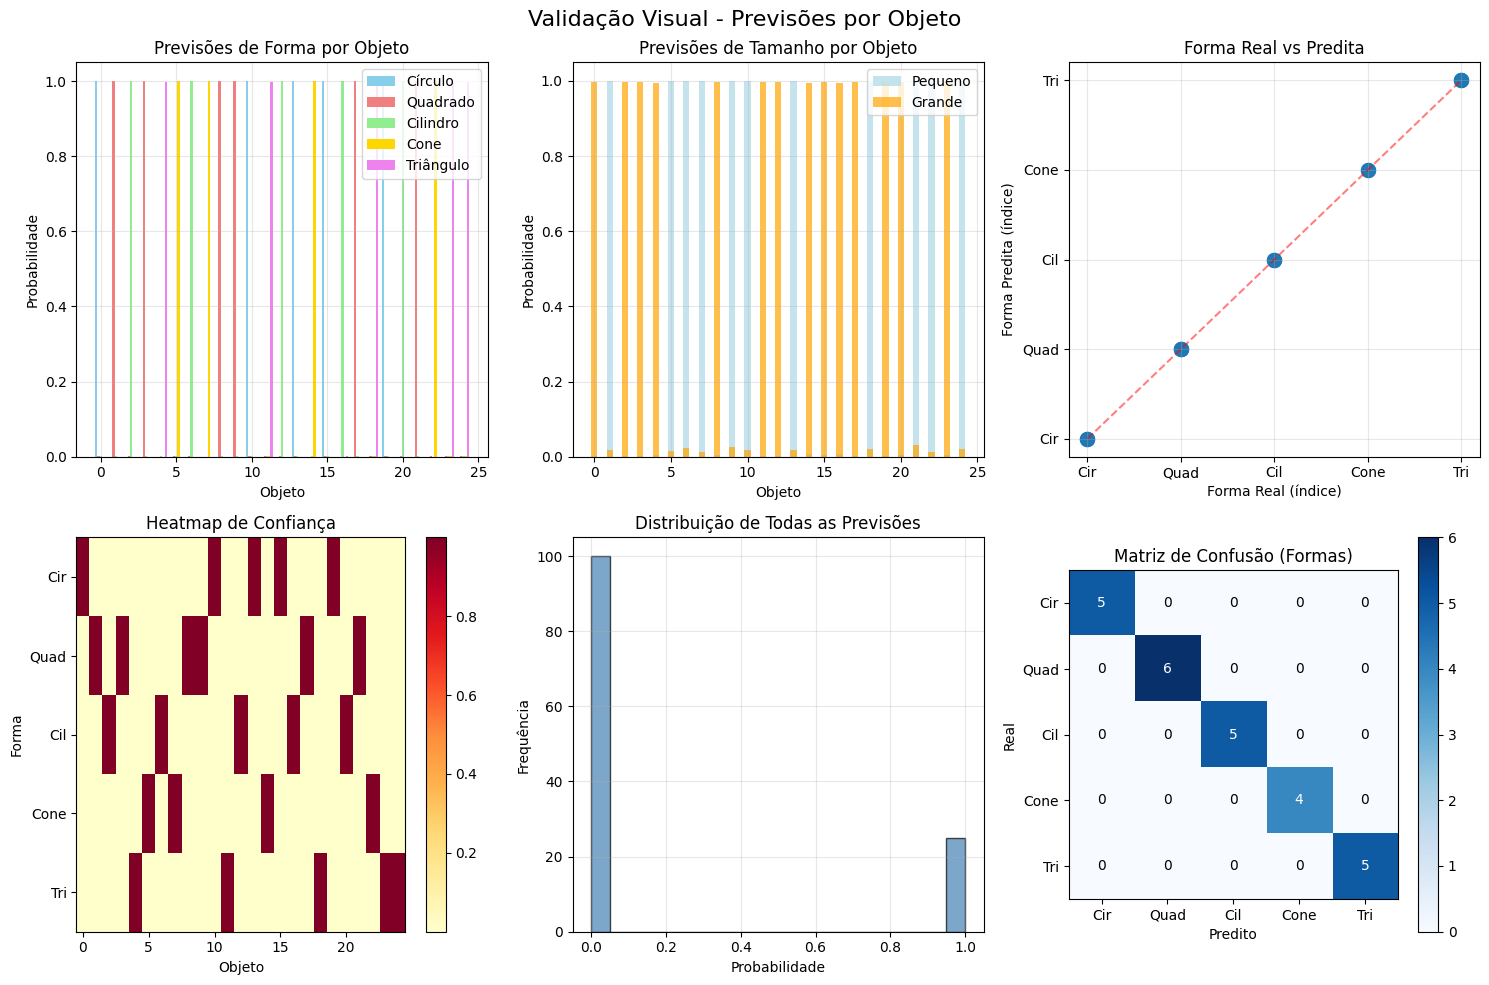

ANÁLISE DE RELAÇÕES ESPACIAIS (PAR A PAR)

1. RELAÇÕES 'LEFT_OF' (>0.7): 30 pares
   Obj0(Cir) → Obj1(Quad)
   Valor: 0.966
   Posições: (0.200,0.900) → (0.320,0.870)
   Diferença X: 0.120

   Obj0(Cir) → Obj3(Quad)
   Valor: 0.974
   Posições: (0.200,0.900) → (0.650,0.800)
   Diferença X: 0.450

   Obj0(Cir) → Obj8(Quad)
   Valor: 0.976
   Posições: (0.200,0.900) → (0.820,0.650)
   Diferença X: 0.620

   Obj0(Cir) → Obj9(Quad)
   Valor: 0.959
   Posições: (0.200,0.900) → (0.220,0.600)
   Diferença X: 0.020

   Obj0(Cir) → Obj17(Quad)
   Valor: 0.971
   Posições: (0.200,0.900) → (0.600,0.350)
   Diferença X: 0.400

   Obj0(Cir) → Obj21(Quad)
   Valor: 0.961
   Posições: (0.200,0.900) → (0.450,0.150)
   Diferença X: 0.250

   Obj10(Cir) → Obj1(Quad)
   Valor: 0.961
   Posições: (0.380,0.560) → (0.320,0.870)
   Diferença X: -0.060

   Obj10(Cir) → Obj3(Quad)
   Valor: 0.972
   Posições: (0.380,0.560) → (0.650,0.800)
   Diferença X: 0.270

   Obj10(Cir) → Obj8(Quad)
   Valor: 0.975
   Pos

In [ ]:
executar_validacao_completa()

#### - Comentário sobre o Código

O código implementa uma pipeline completa de validação para um conjunto de objetos representados por tensores (objects_tensor). Ele realiza as seguintes etapas:

1. Análise Objeto a Objeto: Compara as características reais (posição, cor, forma, tamanho) com as previsões do modelo, indicando se cada previsão está correta.

2. Visualizações gráficas: (função visualizar_previsoes) Permite uma inspeção visual das posições, cores e formas dos objetos.

3. Análise de relações espaciais: Calcula relações como leftOf, rightOf e closeTo entre todos os pares de objetos, verifica consistência lógica e identifica pares com relações fortes.

4. Testes de consultas específicas: Permite consultar condições compostas, como "pequeno abaixo de cilindro e à esquerda de quadrado", e reporta os melhores candidatos.